# Datenexploration

Kommentare stehen immer unter dem jeweiligen Code 

In [5]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pylab
%pip install seaborn
%pip install statsmodels
%pip install scikit-learn
%pip install xgboost
%pip install pmdarima
%pip install mlxtend
%pip install sklearn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\del-f\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\del-f\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab
You should consider upgrading via the 'c:\Users\del-f\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\del-f\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\del-f\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.ensemble

%matplotlib inline
sns.set(rc={'figure.figsize':(10,10)})


### 1 Daten einlesen


In [41]:
df_cal = pd.read_csv('../Data/calendar.csv', sep=',')
df_cal.head()

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1
1,2011-03-02,11105,NaN,NaN,NaN,NaN,1
2,2011-03-03,11105,NaN,NaN,NaN,NaN,1
3,2011-03-04,11105,NaN,NaN,NaN,NaN,1
4,2011-03-05,11106,NaN,NaN,NaN,NaN,1


In [42]:
df_price = pd.read_csv('../Data/prices.csv', sep=',')
df_price.head()

,Unnamed: 0,item_id,week_id,price
0,0,HOBBIES_1_001,11325,9.58
1,1,HOBBIES_1_001,11326,9.58
2,2,HOBBIES_1_001,11327,8.26
3,3,HOBBIES_1_001,11328,8.26
4,4,HOBBIES_1_001,11329,8.26


In [43]:
df_sales = pd.read_csv('../Data/sales.csv', sep=',')
df_sales


,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
5570518,2016-02-29,FOODS_3_823,FOODS_3,FOODS,2
5570519,2016-02-29,FOODS_3_824,FOODS_3,FOODS,0
5570520,2016-02-29,FOODS_3_825,FOODS_3,FOODS,0
5570521,2016-02-29,FOODS_3_826,FOODS_3,FOODS,1


### 2 Datenexploration

#### 2.1 Allgemein

In [44]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1858 non-null   object
 1   week_id       1858 non-null   int64 
 2   event_name_1  151 non-null    object
 3   event_type_1  151 non-null    object
 4   event_name_2  4 non-null      object
 5   event_type_2  4 non-null      object
 6   snap          1858 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 101.7+ KB


In [45]:
df_cal.describe()

,week_id,snap
count,1858.000000,1858.000000
mean,11339.624327,0.328310
std,146.305645,0.469725
min,11105.000000,0.000000
25%,11219.000000,0.000000
50%,11334.000000,0.000000
75%,11447.000000,1.000000
max,11609.000000,1.000000


In [46]:
df_cal['date']

0       2011-03-01
1       2011-03-02
2       2011-03-03
3       2011-03-04
4       2011-03-05
           ...    
1853    2016-03-27
1854    2016-03-28
1855    2016-03-29
1856    2016-03-30
1857    2016-03-31
Name: date, Length: 1858, dtype: object

In [47]:
df_cal['event_name_1'].unique()

array([nan, 'LentStart', 'LentWeek2', 'StPatricksDay', 'Purim End',
       'OrthodoxEaster', 'Pesach End', 'Cinco De Mayo', "Mother's day",
       'MemorialDay', 'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'SuperBowl',
       'ValentinesDay', 'PresidentsDay', 'Easter'], dtype=object)

In [48]:
df_cal['event_name_1'].value_counts()

LentStart              6
StPatricksDay          6
Purim End              6
LentWeek2              6
Halloween              5
PresidentsDay          5
ValentinesDay          5
SuperBowl              5
MartinLutherKingDay    5
OrthodoxChristmas      5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
EidAlAdha              5
LaborDay               5
ColumbusDay            5
Eid al-Fitr            5
Ramadan starts         5
IndependenceDay        5
NBAFinalsEnd           5
NBAFinalsStart         5
MemorialDay            5
Mother's day           5
Pesach End             5
Easter                 5
Father's day           4
Cinco De Mayo          4
OrthodoxEaster         4
Name: event_name_1, dtype: int64

In [49]:
df_cal['event_name_1'].value_counts().sum()

151

Von 1858 Datensätzen finden 151 an einem Feiertag statt.

In [50]:
df_cal['event_name_2'].value_counts()

Easter            1
Cinco De Mayo     1
OrthodoxEaster    1
Father's day      1
Name: event_name_2, dtype: int64

Doppelter Feiertag findet nur 4 mal im Datensatz statt. --> eher unrelevant


In [51]:
df_cal['event_name_2'].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [52]:
df_cal['event_type_1'].unique()

array([nan, 'Religious', 'Cultural', 'National', 'Sporting'], dtype=object)

In [53]:
df_cal['event_type_2'].unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

In [54]:
df_cal[df_cal['event_name_1'] == 'Easter']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
404,2012-04-08,11211,Easter,Cultural,NaN,NaN,1
761,2013-03-31,11310,Easter,Cultural,NaN,NaN,0
1146,2014-04-20,11412,Easter,Cultural,OrthodoxEaster,Religious,0
1496,2015-04-05,11510,Easter,Cultural,NaN,NaN,1
1853,2016-03-27,11609,Easter,Cultural,NaN,NaN,0


In [55]:
df_cal[df_cal['event_name_2'] == 'Easter']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
54,2011-04-24,11113,OrthodoxEaster,Religious,Easter,Cultural,0


Event 2 falls 2 Feiertage am selben Tag stattfinden.


In [56]:
df_cal['snap'].value_counts()

0    1248
1     610
Name: snap, dtype: int64

In [57]:
snap_test = df_cal[(df_cal['week_id']>=11105)&(df_cal['week_id']<=11130)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


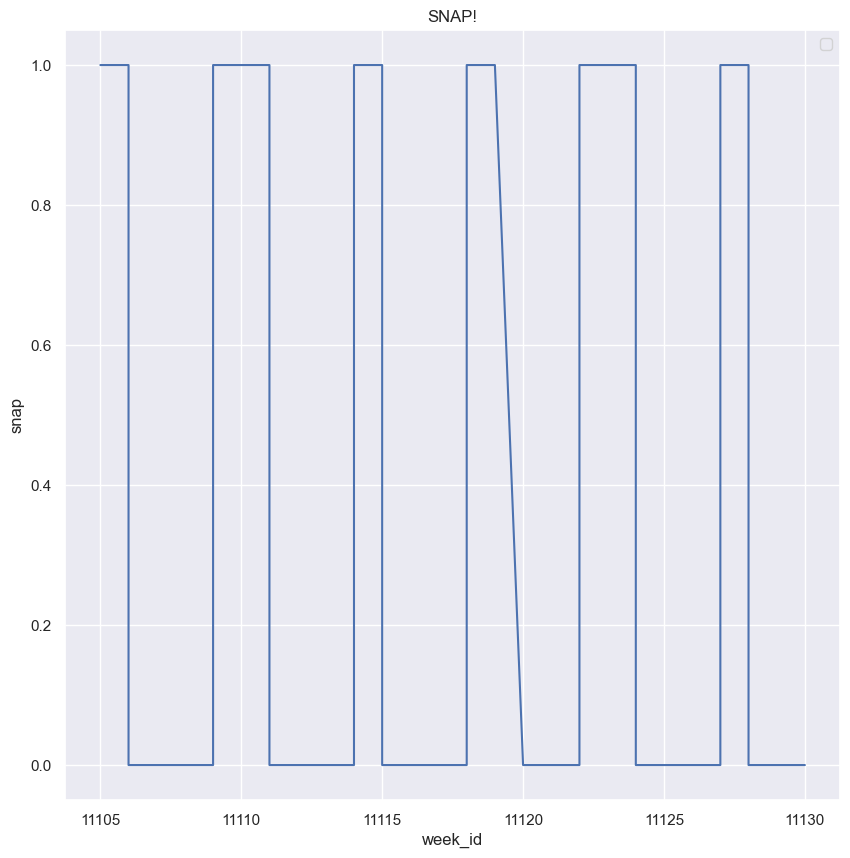

In [58]:
snap_test = df_cal[(df_cal['week_id']>=11105)&(df_cal['week_id']<=11130)]

plt.plot(snap_test['week_id'],snap_test['snap'])
plt.title('SNAP!')
plt.xlabel("week_id")
plt.ylabel("snap")
plt.legend(loc='upper right')
plt.show()

Dauer des Snap Angebots ist immer unterschiedlich lang.

#### 2.2 Prices

In [59]:
df_price = df_price.drop(columns=['Unnamed: 0'])
df_price

,item_id,week_id,price
0,HOBBIES_1_001,11325,9.58
1,HOBBIES_1_001,11326,9.58
2,HOBBIES_1_001,11327,8.26
3,HOBBIES_1_001,11328,8.26
4,HOBBIES_1_001,11329,8.26
...,...,...,...
656545,FOODS_3_827,11605,1.00
656546,FOODS_3_827,11606,1.00
656547,FOODS_3_827,11607,1.00
656548,FOODS_3_827,11608,1.00


In [60]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656550 entries, 0 to 656549
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   item_id  656550 non-null  object 
 1   week_id  656550 non-null  int64  
 2   price    656550 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ MB


Price = durchschnittlicher Verkaufspreis der Items pro jeweiliger Woche

Keine Nan's

In [61]:
df_price['item_id'].value_counts()

HOUSEHOLD_2_429    266
HOUSEHOLD_2_368    266
HOUSEHOLD_2_384    266
HOUSEHOLD_2_383    266
FOODS_3_495        266
                  ... 
FOODS_2_248         23
FOODS_2_117         14
FOODS_2_209         14
FOODS_3_296         11
FOODS_3_595          7
Name: item_id, Length: 3049, dtype: int64

In [62]:
df_price['price'].describe()

count    656550.000000
mean          4.412243
std           3.395917
min           0.010000
25%           2.220000
50%           3.470000
75%           5.770000
max          30.980000
Name: price, dtype: float64

In [63]:
df_price[['item_id','price']][df_price['price']>30].groupby(by='item_id').count()

,price
item_id,
HOBBIES_1_060,110
HOBBIES_1_225,109
HOBBIES_1_361,109


Es gibt 3 Items mit einem Verkaufspreis in der jeweiligen Woche >30

In [64]:
df_price['week_id'].value_counts()

11608    3049
11609    3049
11607    3049
11606    3049
11605    3049
         ... 
11109    1509
11108    1490
11107    1471
11106    1445
11105    1413
Name: week_id, Length: 266, dtype: int64

In unterschiedlichen Wochen gibt es unterschiedlich viele Preise (da Anzahl angebotener Items über Zeit zunimmt)

#### 2.3 Sales

Sales = Abverkauf in Stück pro Produkt pro Tag (auch wenn das Produkt nicht verkauft wurde)



In [65]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570523 entries, 0 to 5570522
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   date     object
 1   item_id  object
 2   dept_id  object
 3   cat_id   object
 4   sales    int64 
dtypes: int64(1), object(4)
memory usage: 212.5+ MB


In [66]:
df_sales[df_sales['sales'].isna()]

,date,item_id,dept_id,cat_id,sales


In [67]:
df_sales['sales'].describe()

count    5.570523e+06
mean     1.319099e+00
std      4.069521e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.480000e+02
Name: sales, dtype: float64

In [68]:
df_sales[df_sales['sales']==0]

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
5570512,2016-02-29,FOODS_3_817,FOODS_3,FOODS,0
5570515,2016-02-29,FOODS_3_820,FOODS_3,FOODS,0
5570516,2016-02-29,FOODS_3_821,FOODS_3,FOODS,0
5570519,2016-02-29,FOODS_3_824,FOODS_3,FOODS,0


In [69]:
df_sales[df_sales['date']=='2011-03-01']

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
3044,2011-03-01,FOODS_3_823,FOODS_3,FOODS,0
3045,2011-03-01,FOODS_3_824,FOODS_3,FOODS,0
3046,2011-03-01,FOODS_3_825,FOODS_3,FOODS,0
3047,2011-03-01,FOODS_3_826,FOODS_3,FOODS,0


Alle 3049 Produkte haben für jedes Date eine Verkaufsanzahl.

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\474284637.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales.groupby(by='cat_id').sum().plot.bar()


<AxesSubplot: xlabel='cat_id'>

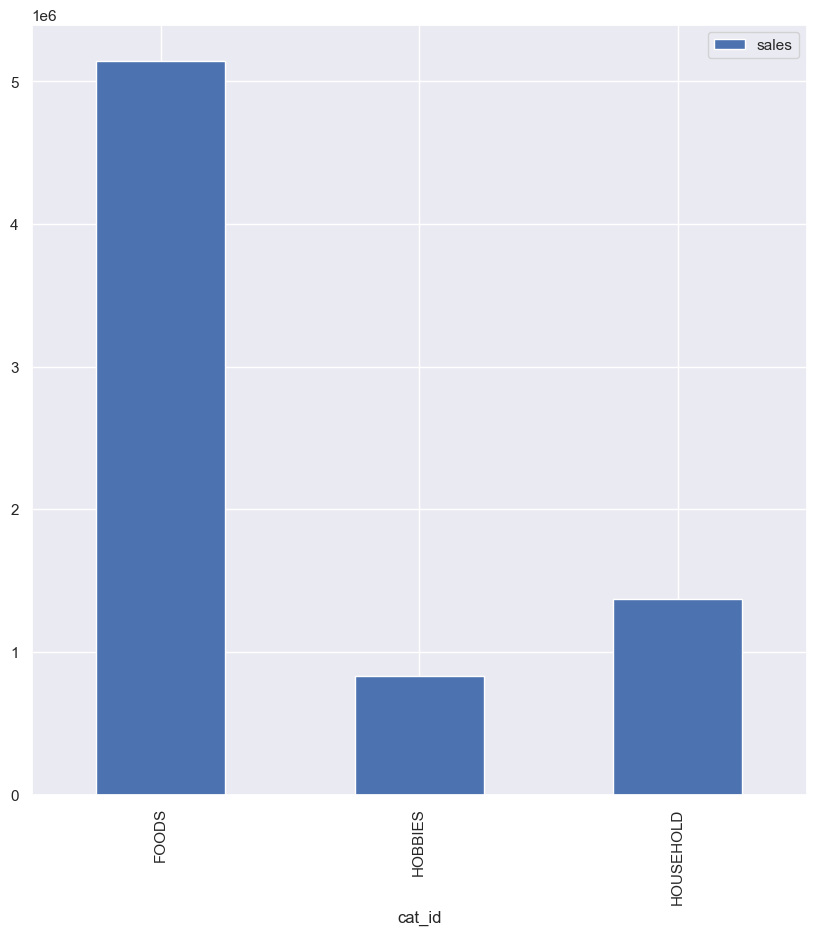

In [70]:
df_sales.groupby(by='cat_id').sum().plot.bar()

### 3 Mergen der Datensätze

Calendar und Sales über das Datum mergen


In [71]:
df_calsales = pd.merge(df_cal,df_sales,how='left',on='date')
df_calsales

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5570549,2016-03-27,11609,Easter,Cultural,NaN,NaN,0,NaN,NaN,NaN,NaN
5570550,2016-03-28,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
5570551,2016-03-29,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
5570552,2016-03-30,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [72]:
df_calsales_past = df_calsales[df_calsales['date']<'2016-03-01']
df_calsales_past

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5570518,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0
5570519,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0
5570520,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0
5570521,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,1.0


In [73]:
df_calsales_future = df_calsales[df_calsales['date']>='2016-03-01']
df_calsales_future = df_calsales_future.drop(columns = ['item_id','dept_id','cat_id'])
df_calsales_future

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,sales
5570523,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN
5570524,2016-03-02,11605,NaN,NaN,NaN,NaN,1,NaN
5570525,2016-03-03,11605,NaN,NaN,NaN,NaN,1,NaN
5570526,2016-03-04,11605,NaN,NaN,NaN,NaN,1,NaN
5570527,2016-03-05,11606,NaN,NaN,NaN,NaN,1,NaN
5570528,2016-03-06,11606,NaN,NaN,NaN,NaN,1,NaN
5570529,2016-03-07,11606,NaN,NaN,NaN,NaN,1,NaN
5570530,2016-03-08,11606,NaN,NaN,NaN,NaN,1,NaN
5570531,2016-03-09,11606,NaN,NaN,NaN,NaN,1,NaN
5570532,2016-03-10,11606,NaN,NaN,NaN,NaN,1,NaN


In [74]:
df_future = pd.merge(df_calsales_future,df_price,how='left',on=['week_id'])
df_future

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,sales,item_id,price
0,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_001,8.26
1,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_002,3.97
2,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_003,2.97
3,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_004,4.64
4,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_005,2.88
...,...,...,...,...,...,...,...,...,...,...
94514,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_823,2.88
94515,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_824,2.48
94516,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_825,3.98
94517,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_826,1.28


In [75]:
df_item_description = df_sales[df_sales['date']==	'2011-03-01']
df_item_description

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
3044,2011-03-01,FOODS_3_823,FOODS_3,FOODS,0
3045,2011-03-01,FOODS_3_824,FOODS_3,FOODS,0
3046,2011-03-01,FOODS_3_825,FOODS_3,FOODS,0
3047,2011-03-01,FOODS_3_826,FOODS_3,FOODS,0


In [76]:
df_future = pd.merge(df_future,df_item_description[['item_id','dept_id','cat_id']],how='left',on=['item_id'])
df_future

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,sales,item_id,price,dept_id,cat_id
0,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_001,8.26,HOBBIES_1,HOBBIES
1,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_002,3.97,HOBBIES_1,HOBBIES
2,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_003,2.97,HOBBIES_1,HOBBIES
3,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_004,4.64,HOBBIES_1,HOBBIES
4,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_005,2.88,HOBBIES_1,HOBBIES
...,...,...,...,...,...,...,...,...,...,...,...,...
94514,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_823,2.88,FOODS_3,FOODS
94515,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_824,2.48,FOODS_3,FOODS
94516,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_825,3.98,FOODS_3,FOODS
94517,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_826,1.28,FOODS_3,FOODS


In [77]:
df_future.isna().sum()

date                0
week_id             0
event_name_1    85372
event_type_1    85372
event_name_2    94519
event_type_2    94519
snap                0
sales           94519
item_id             0
price               0
dept_id             0
cat_id              0
dtype: int64

In [78]:
df_calsales_past

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5570518,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0
5570519,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0
5570520,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0
5570521,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,1.0


In [79]:
df_past = pd.merge(df_calsales_past,df_price,how='left',on=['item_id','week_id'])
df_past

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5570518,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0,2.88
5570519,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0,2.68
5570520,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0,3.98
5570521,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,1.0,1.28


In [80]:
list_df = [df_past,df_future]
df = pd.concat(list_df)
df = df.reset_index(drop=True)
df

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28


### Testen auf Robustheit des Merger

In [81]:
df[(df['item_id']=='HOBBIES_1_010')&(df['week_id']==11105)]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
9,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17
3058,2011-03-02,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17
6107,2011-03-03,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17
9156,2011-03-04,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17


In [82]:
df_price[df_price['week_id']==11105]

,item_id,week_id,price
1428,HOBBIES_1_008,11105,0.42
1694,HOBBIES_1_009,11105,1.56
1960,HOBBIES_1_010,11105,3.17
2432,HOBBIES_1_012,11105,5.98
3134,HOBBIES_1_015,11105,0.72
...,...,...,...
654659,FOODS_3_819,11105,1.98
654925,FOODS_3_820,11105,1.57
655348,FOODS_3_822,11105,4.28
655805,FOODS_3_824,11105,2.48


In [83]:
df_price[(df_price['week_id']==11105) & (df_price['item_id']=='HOBBIES_1_010')]

,item_id,week_id,price
1960,HOBBIES_1_010,11105,3.17


Vergleich Preiswerte aus df_price mit gemergetem Dataframe


In [84]:
df_sales[(df_sales['date']>='2011-03-01')&(df_sales['date']<='2011-03-21')&(df_sales['item_id']=='HOBBIES_1_001')]

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
3049,2011-03-02,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
6098,2011-03-03,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
9147,2011-03-04,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
12196,2011-03-05,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
15245,2011-03-06,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
18294,2011-03-07,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
21343,2011-03-08,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
24392,2011-03-09,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
27441,2011-03-10,HOBBIES_1_001,HOBBIES_1,HOBBIES,0


Vergleich Saleswerte aus df_sales mit gemergetem Dataframe

In [85]:
df.dtypes

date             object
week_id           int64
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
snap              int64
item_id          object
dept_id          object
cat_id           object
sales           float64
price           float64
dtype: object

In [86]:
df['date'] = pd.to_datetime(df['date'])

In [87]:
df.dtypes

date            datetime64[ns]
week_id                  int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap                     int64
item_id                 object
dept_id                 object
cat_id                  object
sales                  float64
price                  float64
dtype: object

Um mit dem Datum rechnen zu können ändern wir den Datentyp von Objekt zu einem datetime-objekt.

### 4 Datenbereinigung

In [88]:
df[(df['date']=='2011-05-23')&(df['item_id']=='HOBBIES_1_010')]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
253076,2011-05-23,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,3.0,2.97


### NaN Werte in Sales


In [89]:
df[df['sales'].isnull()==True]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
5570523,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,NaN,8.26
5570524,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,NaN,3.97
5570525,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,NaN,2.97
5570526,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,NaN,4.64
5570527,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,NaN,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28


NaN Werte in Sales gibt es nur ab dem 01.03.2016 da ab dort keine Sales Daten mehr verfügbar sind, der Kalendar jedoch bis zum 31.03.2016 geht.

In [90]:
df[df['price'].isnull()==True]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5506264,2016-02-08,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5509313,2016-02-09,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5512362,2016-02-10,11602,LentStart,Religious,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5515411,2016-02-11,11602,NaN,NaN,NaN,NaN,0,FOODS_3_595,FOODS_3,FOODS,0.0,NaN


In [91]:
df[df['price'].isna()==True]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5506264,2016-02-08,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5509313,2016-02-09,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5512362,2016-02-10,11602,LentStart,Religious,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5515411,2016-02-11,11602,NaN,NaN,NaN,NaN,0,FOODS_3_595,FOODS_3,FOODS,0.0,NaN


In [92]:
df[(df['price'].isna()==True)&(df['sales']>0)]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price


Price ist nur NaN oder 0 wenn Sales auch 0 sind. Wahrscheinlich wenn das Produkt noch nicht verkauft wurde.

<AxesSubplot: xlabel='week_id', ylabel='sales'>

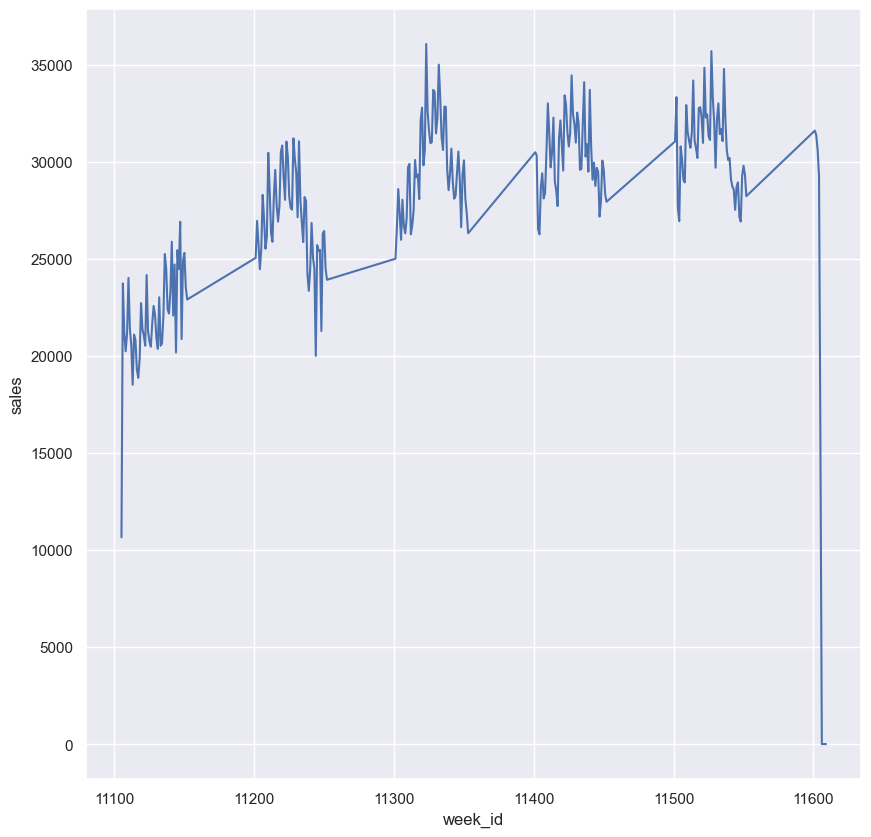

In [93]:
df_plot = df[['week_id', 'sales', 'price']].groupby(by='week_id').agg({'sales': 'sum', 'price': 'mean'})

sns.lineplot(x=df_plot.index, y='sales', data=df_plot)

Wenn wir anhand der Week_id gruppieren fehlen uns Zeiträume

In [94]:
df_plot.loc['11150':'11201']


,sales,price
week_id,,
11150,25308.0,4.254329
11151,23540.0,4.261167
11152,22905.0,4.262562
11201,25052.0,4.265123


In [95]:
df_cal[df_cal['week_id']== 11151]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
319,2012-01-14,11151,NaN,NaN,NaN,NaN,0
320,2012-01-15,11151,NaN,NaN,NaN,NaN,0
321,2012-01-16,11151,MartinLutherKingDay,National,NaN,NaN,0
322,2012-01-17,11151,NaN,NaN,NaN,NaN,0
323,2012-01-18,11151,NaN,NaN,NaN,NaN,0
324,2012-01-19,11151,NaN,NaN,NaN,NaN,0
325,2012-01-20,11151,NaN,NaN,NaN,NaN,0


Week_id endet immer in der Endung 52 und springt dann zum nächsten Hunderter. Daher erstellen wir eine eigene Spalte mit der KW/Jahr.

In [96]:
df.head()

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN


In [97]:
import datetime
df['yearcw'] = df['date'].dt.year.astype('str') + df['date'].dt.strftime('%W')


<AxesSubplot: xlabel='yearcw', ylabel='sales'>

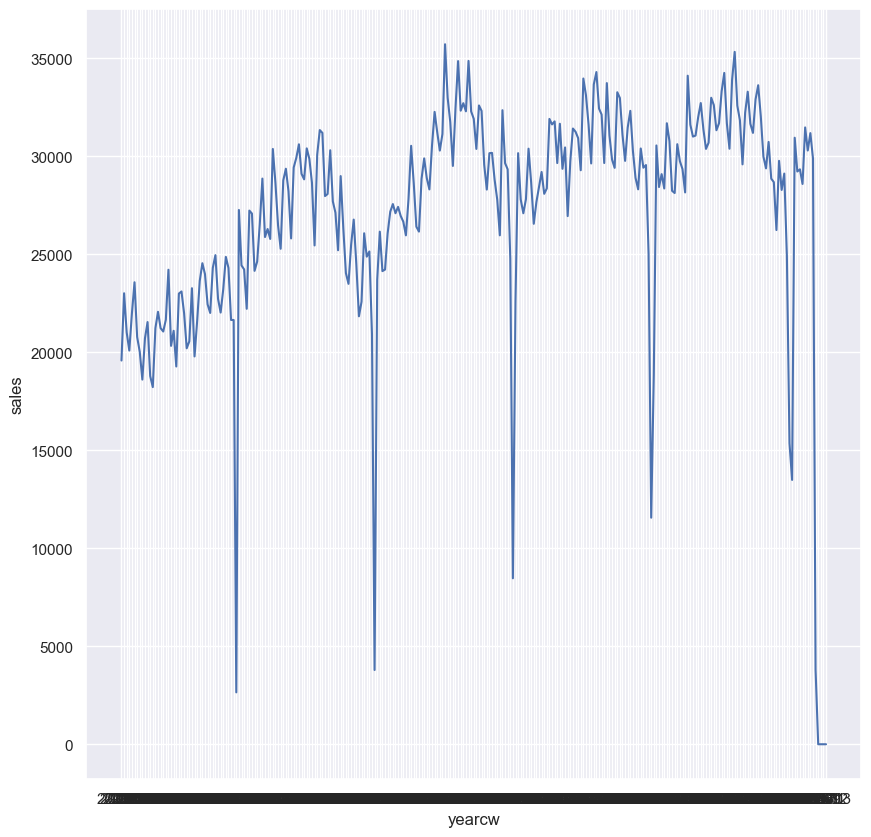

In [98]:
df_plot2 = df[['yearcw', 'sales', 'price']].groupby(by='yearcw').agg({'sales': 'sum', 'price': 'mean'})

sns.lineplot(x=df_plot2.index, y='sales', data=df_plot2)

In [99]:
df[df['yearcw']=='201352']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw
3155715,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,8.26,201352
3155716,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,3.97,201352
3155717,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201352
3155718,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,1.0,4.64,201352
3155719,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,3.08,201352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161808,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0,2.50,201352
3161809,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0,2.68,201352
3161810,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0,3.98,201352
3161811,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,0.0,1.28,201352


In [100]:
df_plot2.iloc[145:155]

,sales,price
yearcw,,
201347,25970.0,4.395055
201348,32355.0,4.394091
201349,29655.0,4.394340
201350,29338.0,4.393391
201351,24772.0,4.391828
201352,8469.0,4.388859
201400,22585.0,4.391800
201401,30163.0,4.398940
201402,27802.0,4.407356


Die letzte Jahreswoche hat nach dieser Zählung zB 2013 nur 2 Tage, da die Kalenderwochenzählung am 01.01. wieder bei 1 beginnt, daher sind die Sales in der letzten Woche so niedrig

<AxesSubplot: xlabel='date', ylabel='sales'>

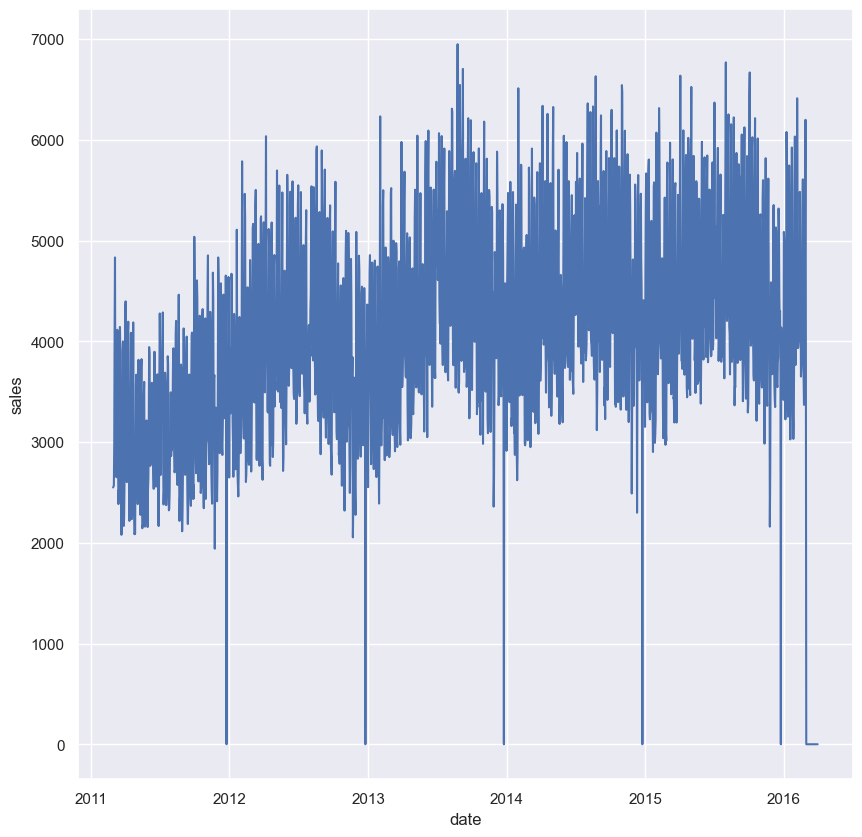

In [101]:
df_plot3 = df[['date', 'sales', 'price']].groupby(by='date').agg({'sales': 'sum', 'price': 'mean'})

sns.lineplot(x=df_plot3.index, y='sales', data=df_plot3)

In [102]:
df_plot3.iloc[290:310]

,sales,price
date,,
2011-12-16,3399.0,4.268003
2011-12-17,4463.0,4.274261
2011-12-18,4253.0,4.274261
2011-12-19,3333.0,4.274261
2011-12-20,3236.0,4.274261
2011-12-21,3367.0,4.274261
2011-12-22,3609.0,4.274261
2011-12-23,4652.0,4.274261
2011-12-24,3454.0,4.275740


Bei der Betrachtung nach einzelnen Tagen fällt der 25.12. jedes Jahr auf mit Sales von 0 --> Filiale an Weihnachten geschlossen

<AxesSubplot: ylabel='sales'>

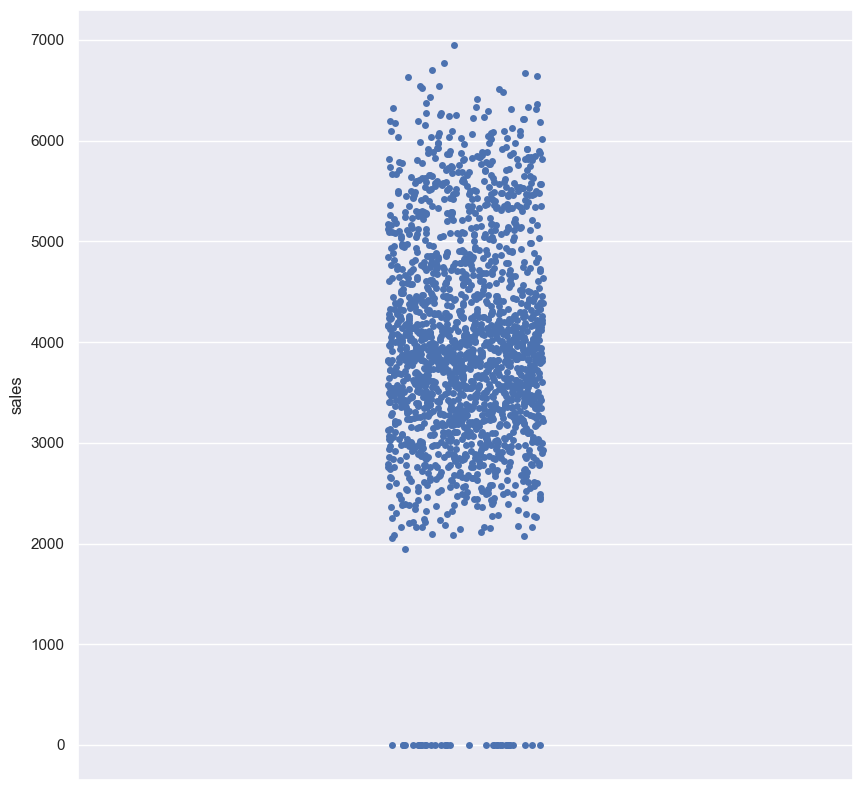

In [103]:
sns.stripplot(
    data=df_plot3,
    y='sales'
)

Im Schnitt befinden sich die täglichen Sales zwischen 3000 und 5000

Text(0.5, 1.0, 'Avg Price per day')

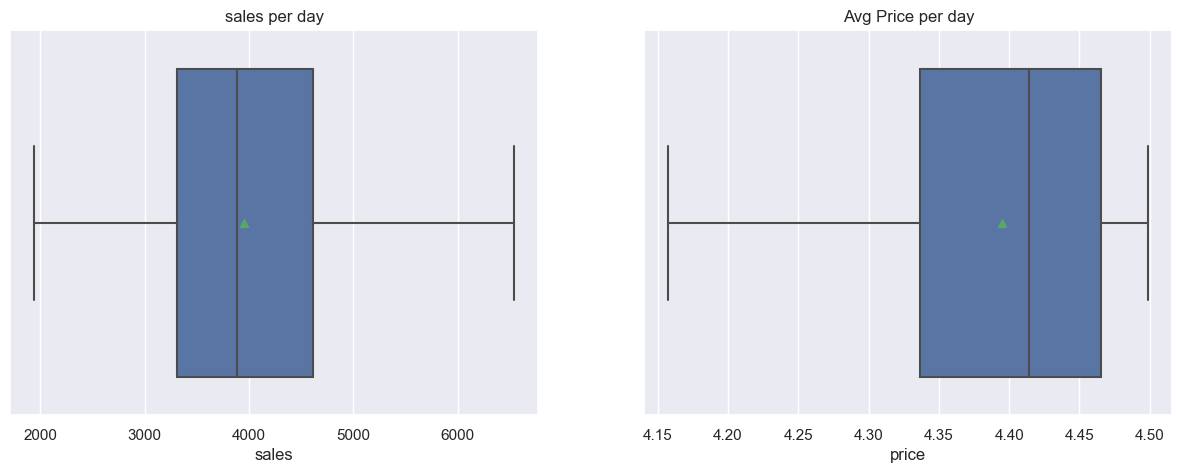

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#fig.suptitle('')

sns.boxplot(data=df_plot3, x='sales', showmeans=True, showfliers=False, ax=axes[0])
axes[0].set_title('sales per day')

sns.boxplot(data=df_plot3, x='price', showmeans=True, showfliers=False, ax=axes[1])
axes[1].set_title('Avg Price per day')


C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\98930927.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.lineplot(


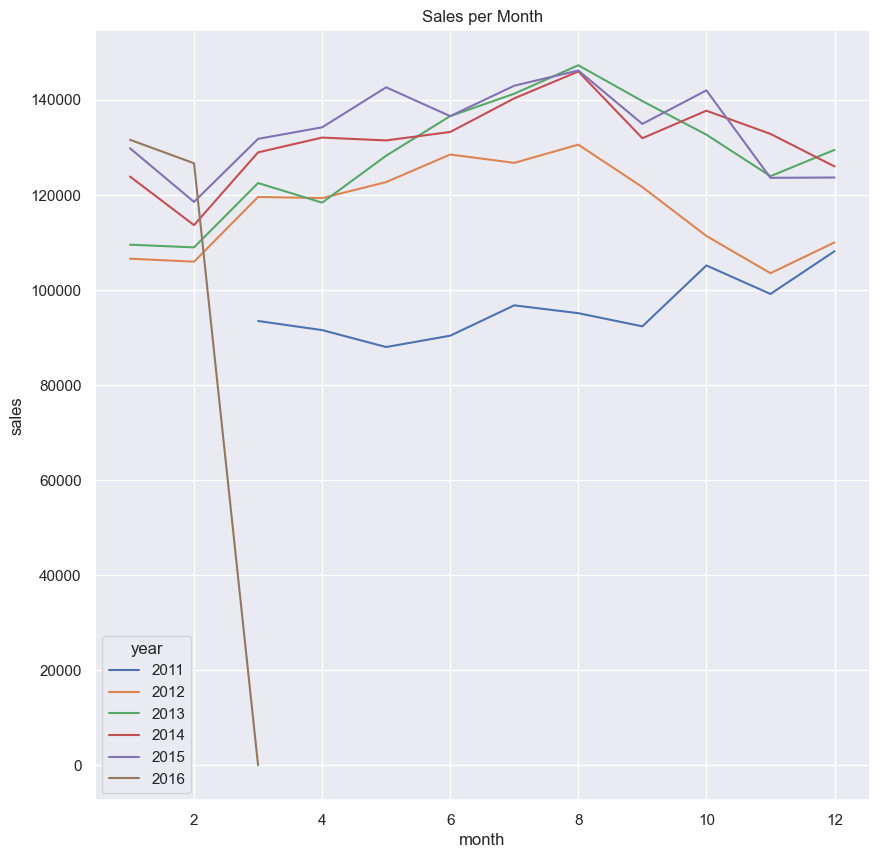

In [105]:
df_plot4 = df[['date', 'sales']].groupby(by='date').sum()
df_plot4.reset_index(inplace=True)
df_plot4['year'] = df_plot4['date'].dt.year
df_plot4['month'] = df_plot4['date'].dt.month

plot = sns.lineplot(
    data=df_plot4,
    x='month',
    y='sales',
    hue='year',
    estimator=sum,
    ci=None,
    palette='deep'
).set(title='Sales per Month')

In [108]:
data = df_plot5.loc['2014-06-15':'2014-06-30']
g = sns.lineplot(data = data)

NameError: name 'df_plot5' is not defined

Wir sehen in den Sales Daten einen starken 7-tägigen saisonalen Verlauf. Bis Donnerstags sinken die Sales stark und steigen bis Sonntag an. 
Deshalb rechnen wir den 7tägigen Trend raus. 

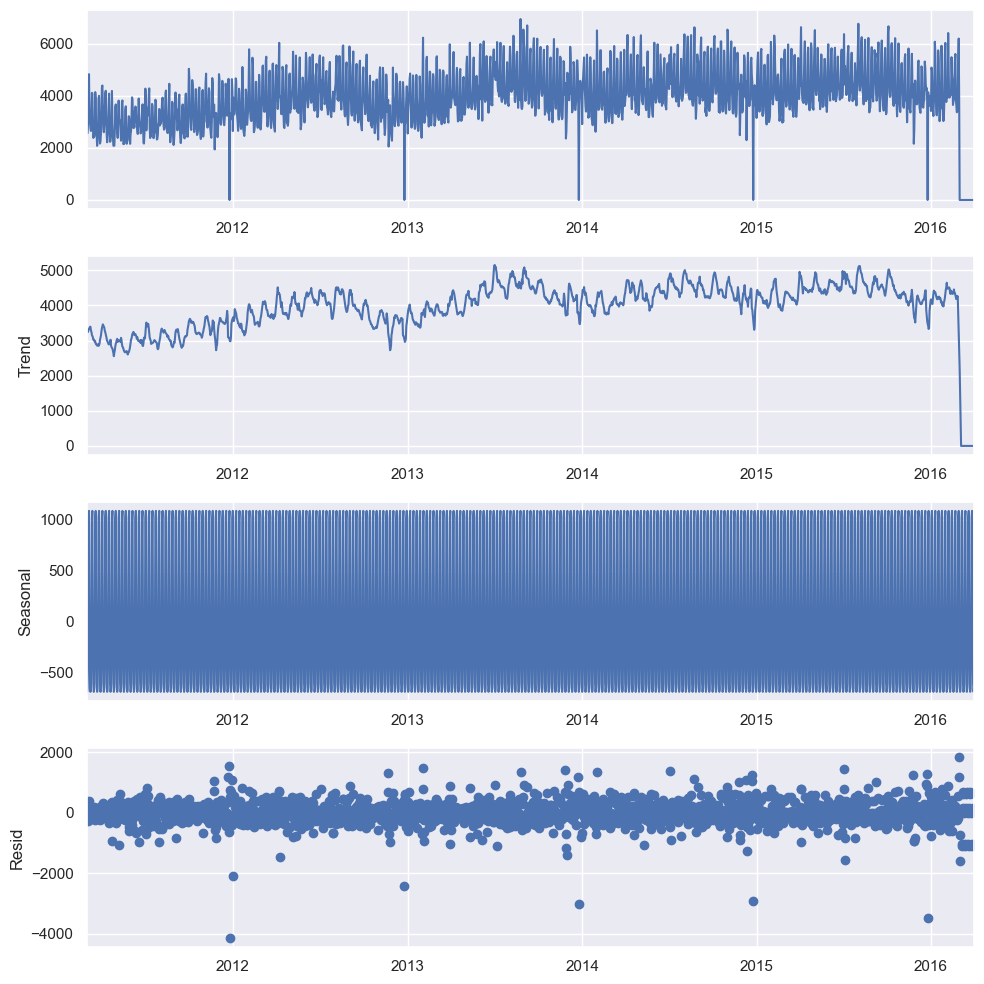

In [275]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(
    x=df_plot5,
    period=7
)

decompose.plot()
plt.show()

Zur Prüfung vergleichen wir das Ergebnis mit einem 14tägigen saisonalen Effekt.

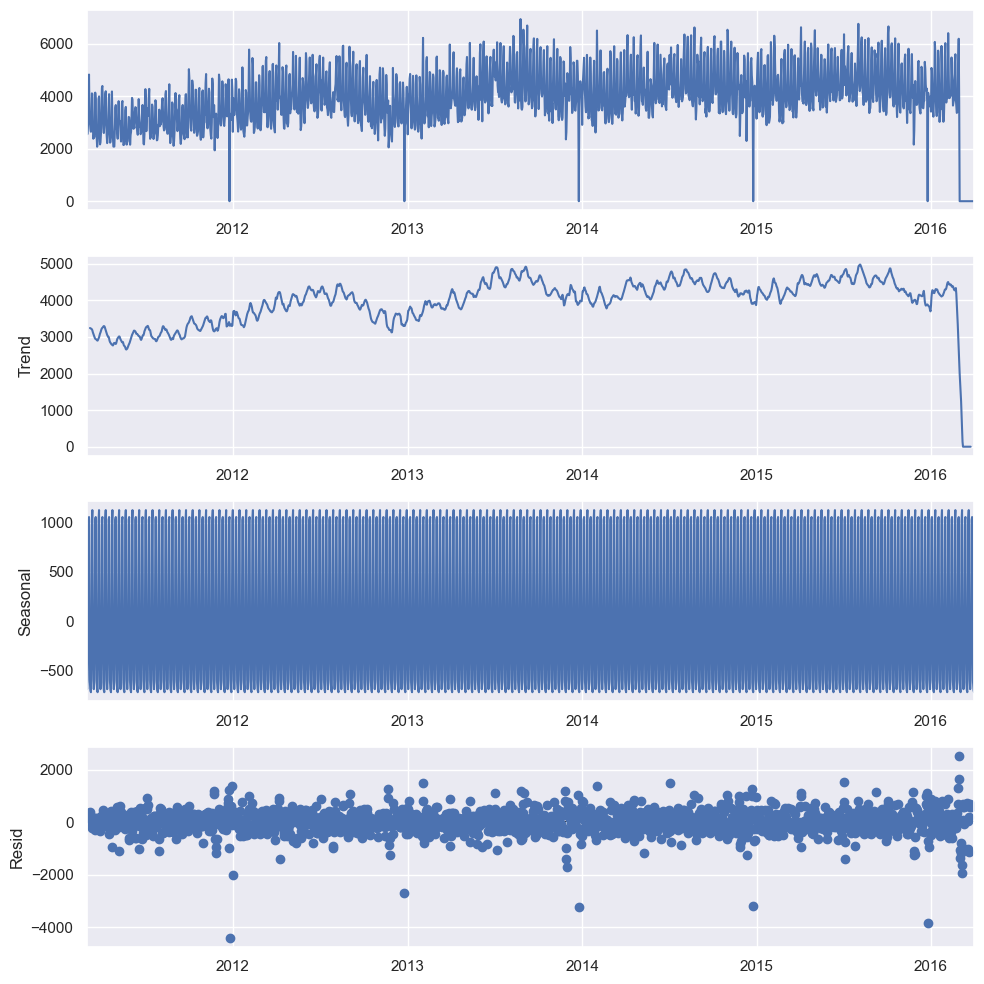

In [276]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose2 = seasonal_decompose(
    x=df_plot5,
    period=14
)

decompose2.plot()
plt.show()

Hier sehen wir jedoch keine signifikanten Änderungen im Trend. 

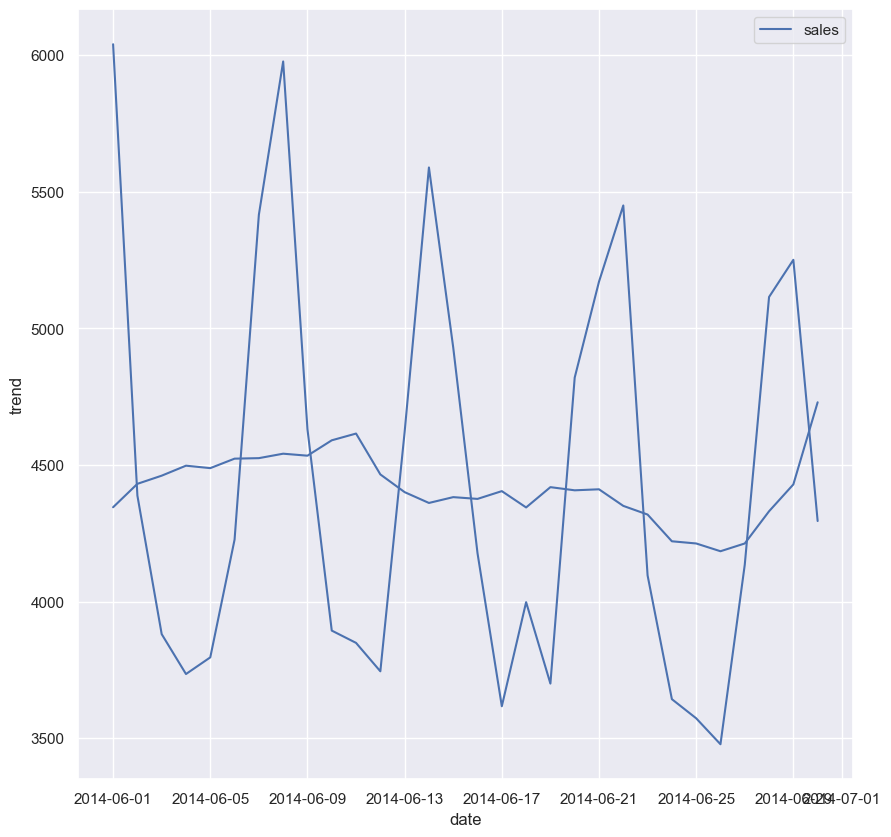

In [277]:
data = decompose.trend.loc['2014-06-01':'2014-06-30']
g1 = sns.lineplot(data = data)

data = df_plot5.loc['2014-06-01':'2014-06-30']
g2 = sns.lineplot(data = data, ax=g1)



Wenn wir uns den Trend ohne die 7tägige Saisonalität anschauen sehen wir keine auffälligen Saisonalitäten mehr.

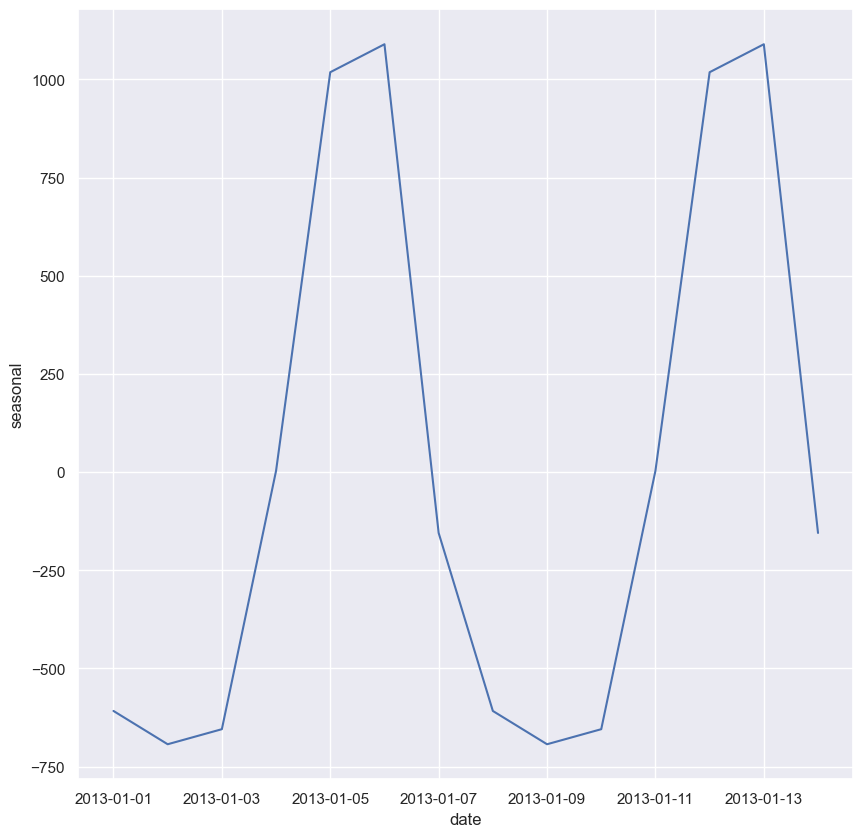

In [278]:
data = decompose.seasonal.loc['2013-01-01':'2013-01-14']
g = sns.lineplot(data = data)

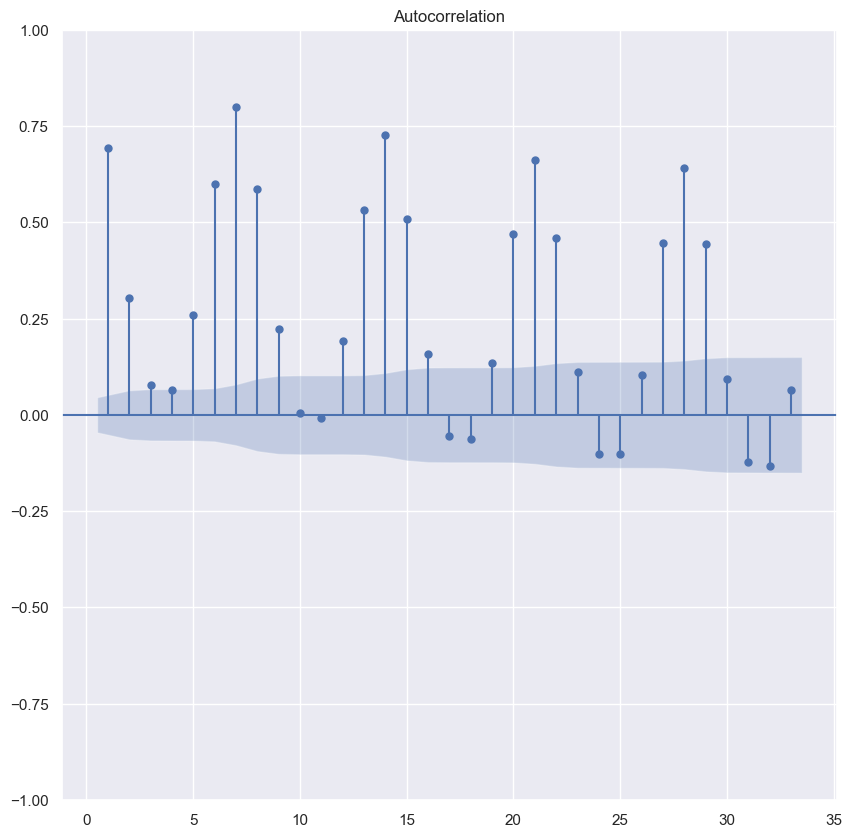

c:\Users\Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


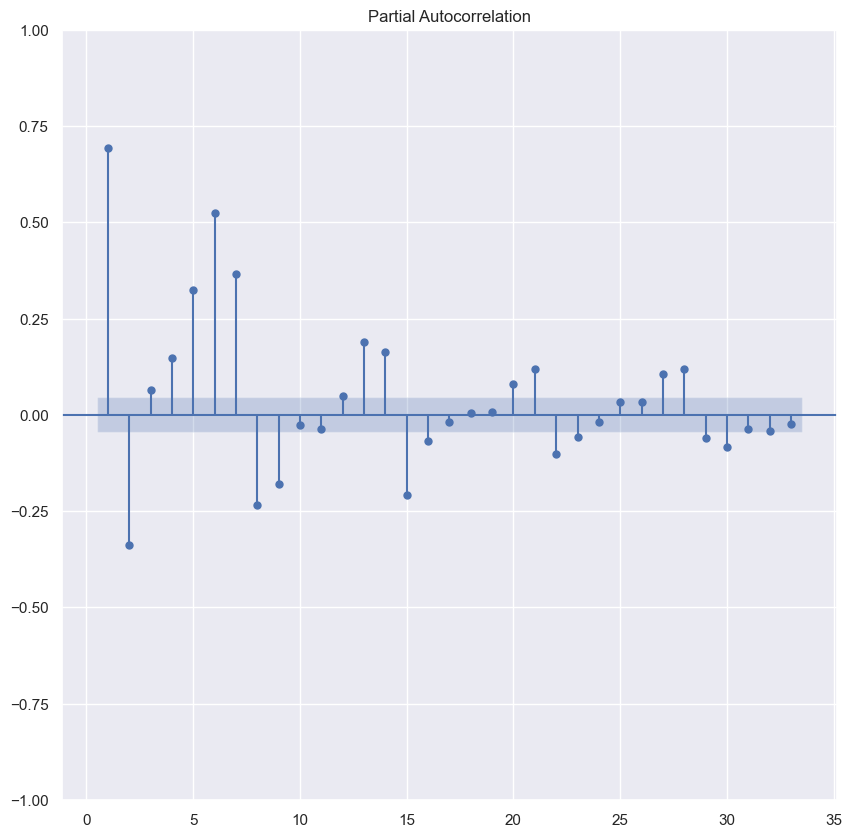

In [279]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

data = df_plot5

plot_acf(data, zero = False)
plt.show()
plot_pacf(data, zero = False)
plt.show()

ACF - Der selbe Tag in der Vorwoche hat einen starken Einfluss auf die Sales Zahlen über die Woche. D.h. wenn der Sonntag sehr gut läuft werden die anderen Tage aus eher gut laufen aber nur so gut wie die einzelnen Tage normalerweiser immer laufen. D.h. ein guter Sonntag führt auch zu einem guten Mittwoch der aber natürlich weniger Sales hat als der Sonntag. 
PACF - Der letzte Tag hat einen starken direkten Einfluss auf das Ergebnis des Folgetages. Die Performance der Vorwoche hat einen starken Einfluss auf das Ergebnis des untersuchten Tages, die Woche davor wieder weniger usw.


## Creation of DataFrames

### Set Datatypes

In [109]:

df['dayofweek'] = df['date'].dt.dayofweek.astype('category')
df['month'] = df['date'].dt.month.astype('category')
df['weekofyear'] = df['date'].dt.weekofyear.astype('category')
df['dayofmonth'] = df['date'].dt.day.astype('category')
df

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\2983294101.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear.astype('category')


,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28,201613,3,3,13,31


In [110]:
df.dtypes

date            datetime64[ns]
week_id                  int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap                     int64
item_id                 object
dept_id                 object
cat_id                  object
sales                  float64
price                  float64
yearcw                  object
dayofweek             category
month                 category
weekofyear            category
dayofmonth            category
dtype: object

In [111]:
#ggf direkt oben zum int machen, sonst doppelt gemoppelt
df[['dayofweek','month','weekofyear','dayofmonth','yearcw']] = df[['dayofweek','month','weekofyear','dayofmonth','yearcw']].astype('int')
df['snap'] = df['snap'].astype(bool)
df.set_index('date', inplace = True)
df.sort_index(axis = 0, ascending = True, inplace = True)

df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth
date,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31


### 5. Creation Data Frames

Beschreibung aller DF Typen:
1 DF Wochentag und Monat  
1 DF Durchschnittlicher Preis, Kategorie Wochentag und Event_type, Snap  
1 DF Prognose der Sales je Kategorie mit Durchschnittlichem Preis, Kategorie Wochentag und Event_type, Snap

#### 5.1 Creation Data Frame Medium

In [112]:
df.event_type_1 = pd.Categorical(df.event_type_1)

In [113]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap                bool
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw             int32
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
dtype: object

In [114]:
df['event_code'] = df.event_type_1.cat.codes

In [115]:
df['event_type_1'].unique()

[NaN, 'Religious', 'Cultural', 'National', 'Sporting']
Categories (4, object): ['Cultural', 'National', 'Religious', 'Sporting']

In [116]:
df['event_code'].unique()

array([-1,  2,  0,  1,  3], dtype=int8)

In [117]:
df[df['event_type_1']=='Religious']

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,4.34,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201612,3,3,12,24,2
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.68,201612,3,3,12,24,2
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201612,3,3,12,24,2


NaN = -1 ; Religious = 2 ; Cultural = 0 ; National = 1 ; Sporting = 3 

In [118]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap                bool
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw             int32
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
event_code          int8
dtype: object

In [119]:
df[['event_code']] = df[['event_code']].astype('int')

In [120]:
df_medium = df[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_medium[['dayofweek','month','event_code','snap']] = df_medium[['dayofweek','month','event_code','snap']].astype('category')

In [121]:
df_medium_past = df_medium[df_medium.index<'2016-03-01']
df_medium_future = df_medium[df_medium.index>='2016-03-01']
df_medium_future.drop(columns='sales',inplace=True)
X_medium = df_medium_past.drop(columns='sales')
y_medium = df_medium_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\4193895854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_future.drop(columns='sales',inplace=True)


In [122]:
df_medium

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0


### Creation Data Frame Complex
1 DF Prognose der Sales je Kategorie mit Durchschnittlichem Preis, Kategorie Wochentag und Event_type, Snap

In [ ]:
df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [ ]:
df_hobbies = df[df['cat_id']=='HOBBIES']
df_hobbies

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_145,HOBBIES_2,HOBBIES,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_146,HOBBIES_2,HOBBIES,NaN,1.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_147,HOBBIES_2,HOBBIES,NaN,0.97,201613,3,3,13,31,-1


In [ ]:
df_household = df[df['cat_id']=='HOUSEHOLD']
df_household

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,0.0,1.98,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,0.0,10.72,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_512,HOUSEHOLD_2,HOUSEHOLD,NaN,3.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_513,HOUSEHOLD_2,HOUSEHOLD,NaN,2.78,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,NaN,19.54,201613,3,3,13,31,-1


In [ ]:
df_foods = df[df['cat_id']=='FOODS']
df_foods

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_001,FOODS_1,FOODS,2.0,2.00,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_002,FOODS_1,FOODS,1.0,7.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_003,FOODS_1,FOODS,0.0,2.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_004,FOODS_1,FOODS,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_005,FOODS_1,FOODS,0.0,2.94,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31,-1


In [ ]:
df_hobbies = df_hobbies[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_hobbies.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_hobbies[['dayofweek','month','event_code','snap']] = df_hobbies[['dayofweek','month','event_code','snap']].astype('category')
df_hobbies

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,230.0,1.0,3.0,4.434672,-1.0,1.0
2011-03-02,197.0,2.0,3.0,4.434672,-1.0,1.0
2011-03-03,168.0,3.0,3.0,4.434672,-1.0,1.0
2011-03-04,193.0,4.0,3.0,4.434672,-1.0,1.0
2011-03-05,300.0,5.0,3.0,4.425600,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.571487,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.571487,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.571487,-1.0,0.0


In [ ]:
df_hobbies_past = df_hobbies[df_hobbies.index<'2016-03-01']
df_hobbies_future = df_hobbies[df_hobbies.index>='2016-03-01']
df_hobbies_future.drop(columns='sales',inplace=True)
X_hobbies = df_hobbies_past.drop(columns='sales')
y_hobbies = df_hobbies_past['sales']

C:\Users\Dave\AppData\Local\Temp\ipykernel_5076\329928890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hobbies_future.drop(columns='sales',inplace=True)


In [ ]:
df_household = df_household[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_household.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_household[['dayofweek','month','event_code','snap']] = df_household[['dayofweek','month','event_code','snap']].astype('category')
df_household

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,423.0,1.0,3.0,5.566356,-1.0,1.0
2011-03-02,397.0,2.0,3.0,5.566356,-1.0,1.0
2011-03-03,416.0,3.0,3.0,5.566356,-1.0,1.0
2011-03-04,416.0,4.0,3.0,5.566356,-1.0,1.0
2011-03-05,573.0,5.0,3.0,5.571455,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.477316,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.477316,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.477316,-1.0,0.0


In [ ]:
df_household_past = df_household[df_household.index<'2016-03-01']
df_household_future = df_household[df_household.index>='2016-03-01']
df_household_future.drop(columns='sales',inplace=True)
X_household = df_household_past.drop(columns='sales')
y_household = df_household_past['sales']

C:\Users\Dave\AppData\Local\Temp\ipykernel_5076\3147528750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_household_future.drop(columns='sales',inplace=True)


In [ ]:
df_foods = df_foods[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_foods.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_foods[['dayofweek','month','event_code','snap']] = df_foods[['dayofweek','month','event_code','snap']].astype('category')
df_foods

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,1896.0,1.0,3.0,3.125868,-1.0,1.0
2011-03-02,1965.0,2.0,3.0,3.125868,-1.0,1.0
2011-03-03,1984.0,3.0,3.0,3.125868,-1.0,1.0
2011-03-04,2369.0,4.0,3.0,3.125868,-1.0,1.0
2011-03-05,3223.0,5.0,3.0,3.111022,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,3.344823,0.0,0.0
2016-03-28,0.0,0.0,3.0,3.344823,-1.0,0.0
2016-03-29,0.0,1.0,3.0,3.344823,-1.0,0.0


In [ ]:
df_foods_past = df_foods[df_foods.index<'2016-03-01']
df_foods_future = df_foods[df_foods.index>='2016-03-01']
df_foods_future.drop(columns='sales',inplace=True)
X_foods = df_foods_past.drop(columns='sales')
y_foods = df_foods_past['sales']

C:\Users\Dave\AppData\Local\Temp\ipykernel_5076\2018936748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foods_future.drop(columns='sales',inplace=True)


### Creation Data Frame Categories

In [ ]:
df['dept_id'].nunique()

7

In [ ]:
df_categories = df.copy()
df_categories = df_categories.groupby(['date','dept_id'])['event_code','snap','sales','price','dayofweek','month'].agg(
    {   'event_code': 'first',
        'snap': 'first',
        'sales': 'sum',
        'price': 'mean',
        'dayofweek': 'first',
        'month': 'first'})

In [ ]:
df_categories

event_code   snap   sales     price  dayofweek  month
date       dept_id                                                           
2011-03-01 FOODS_1              -1   True   276.0  2.968496          1      3
           FOODS_2              -1   True   401.0  3.868844          1      3
           FOODS_3              -1   True  1219.0  2.788026          1      3
           HOBBIES_1            -1   True   217.0  4.961522          1      3
           HOBBIES_2            -1   True    13.0  2.819000          1      3
...                            ...    ...     ...       ...        ...    ...
2016-03-31 FOODS_3              -1  False     0.0  2.923621          3      3
           HOBBIES_1            -1  False     0.0  6.644423          3      3
           HOBBIES_2            -1  False     0.0  2.575906          3      3
           HOUSEHOLD_1          -1  False     0.0  5.187519          3      3
           HOUSEHOLD_2          -1  False     0.0  5.776680          3      3

[13006 rows x 6 columns]

In [ ]:
df_categories.dtypes

event_code      int32
snap             bool
sales         float64
price         float64
dayofweek       int32
month           int32
dtype: object

In [ ]:
df_categories.reset_index(inplace=True)
df_categories.set_index('date', inplace=True)

In [ ]:
df_categories['dept_id'] = df_categories['dept_id'].astype('category')
df_categories['snap'] = df_categories['snap'].astype('int')

In [ ]:
enc = OrdinalEncoder()
enc.fit(df_categories[["dept_id"]])
df_categories[["dept_id"]] = enc.transform(df_categories[["dept_id"]])

In [ ]:
df_categories_past = df_categories[df_categories.index<'2016-03-01']
df_categories_future = df_categories[df_categories.index>='2016-03-01']
df_categories_future.drop(columns='sales',inplace=True)
X_categories = df_categories_past.drop(columns='sales')
y_categories = df_categories_past['sales']

### Data Frame All

In [164]:
df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31,-1


In [165]:
df_all = df.copy()
df_all = df[['week_id','yearcw','dayofmonth','weekofyear','dayofweek','month','sales','price','event_code','snap']].groupby(by=df.index).agg({'sales':'sum','dayofweek':'mean','month':'mean','weekofyear':'mean','yearcw':'mean', 'price':'mean','event_code':'mean','snap':'mean','dayofmonth':'mean'})

In [166]:
df_all

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth
date,,,,,,,,,
2011-03-01,2549.0,1.0,3.0,9.0,201109.0,4.167098,-1.0,1.0,1.0
2011-03-02,2559.0,2.0,3.0,9.0,201109.0,4.167098,-1.0,1.0,2.0
2011-03-03,2568.0,3.0,3.0,9.0,201109.0,4.167098,-1.0,1.0,3.0
2011-03-04,2978.0,4.0,3.0,9.0,201109.0,4.167098,-1.0,1.0,4.0
2011-03-05,4096.0,5.0,3.0,9.0,201109.0,4.157467,-1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612.0,4.489718,0.0,0.0,27.0
2016-03-28,0.0,0.0,3.0,13.0,201613.0,4.489718,-1.0,0.0,28.0
2016-03-29,0.0,1.0,3.0,13.0,201613.0,4.489718,-1.0,0.0,29.0


In [167]:
df_all['event_code'] = df_all['event_code'].astype('int')
df_all['price_change_day'] = df_all['price'].diff()
df_all['price_change_week'] = df_all['price'].diff(periods=7)
df_all['snap_since'] = df_all.groupby((df_all['snap'] == 1).cumsum()).cumcount()
df_all['snap_until'] = df_all.groupby((df_all['snap'] == 1).cumsum()).cumcount(ascending=False)
df_all['snap_first_or_last_day'] = df_all['snap'].diff()
df_all[['price_change_day','price_change_week']] = df_all[['price_change_day','price_change_week']].fillna(0)
df_all['sales_last_month_same_day'] = df_all['sales'].shift(35)
#df_all['avg_sales_last_31_days'] = df_all['sales'].rolling(min_periods=1,window=31).mean()
df_all['days_since_last_holiday'] = df_all.groupby((df_all['event_code'] >= 0).cumsum()).cumcount()
df_all['days_until_next_holiday'] = df_all.groupby((df_all['event_code'] >= 0).cumsum()).cumcount(ascending=False)
#df_all = df_all.drop(columns='event_code')
df_all = df_all.iloc[35:,:]
df_all

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday
date,,,,,,,,,,,,,,,,,
2011-04-05,2784.0,1.0,4.0,14.0,201114.0,4.201332,-1,1.0,5.0,0.000000,0.008721,0,0,0.0,2549.0,16,18
2011-04-06,2602.0,2.0,4.0,14.0,201114.0,4.201332,-1,1.0,6.0,0.000000,0.008721,0,0,0.0,2559.0,17,17
2011-04-07,2976.0,3.0,4.0,14.0,201114.0,4.201332,-1,1.0,7.0,0.000000,0.008721,0,0,0.0,2568.0,18,16
2011-04-08,3294.0,4.0,4.0,14.0,201114.0,4.201332,-1,1.0,8.0,0.000000,0.008721,0,0,0.0,2978.0,19,15
2011-04-09,4083.0,5.0,4.0,14.0,201114.0,4.205870,-1,1.0,9.0,0.004538,0.004538,0,0,0.0,4096.0,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612.0,4.489718,0,0.0,27.0,0.000000,-0.000410,17,4,0.0,5607.0,0,4
2016-03-28,0.0,0.0,3.0,13.0,201613.0,4.489718,-1,0.0,28.0,0.000000,-0.000410,18,3,0.0,3905.0,1,3
2016-03-29,0.0,1.0,3.0,13.0,201613.0,4.489718,-1,0.0,29.0,0.000000,-0.000410,19,2,0.0,3613.0,2,2


In [168]:
df_all_past = df_all[df_all.index<'2016-03-01']
df_all_future = df_all[df_all.index>='2016-03-01']
df_all_future.drop(columns='sales',inplace=True)
X_all = df_all_past.drop(columns='sales')
y_all = df_all_past['sales']


C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\2903939678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_future.drop(columns='sales',inplace=True)


## Exploration new features

<AxesSubplot:xlabel='event_code', ylabel='sales'>

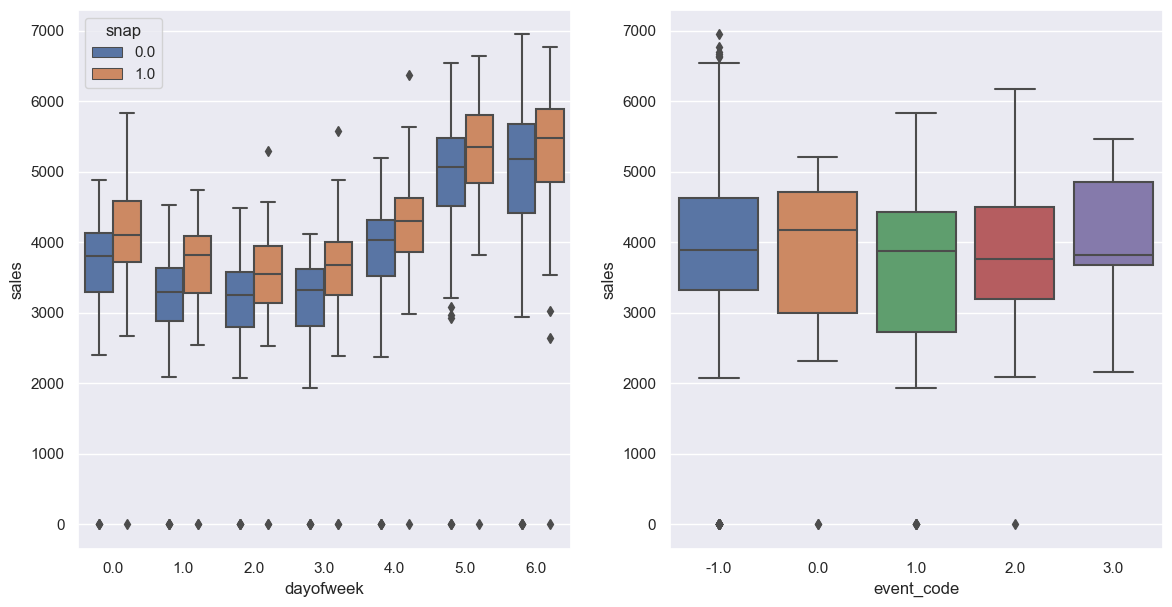

In [ ]:
rows, cols = 1, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'dayofweek', y = "sales", hue = 'snap', data = df_medium, ax = axs[0])
sns.boxplot(x = 'event_code', y = "sales", data = df_medium, ax = axs[1])


NaN = -1 ; Religious = 2 ; Cultural = 0 ; National = 1 ; Sporting = 3 

In [ ]:
plt.plot(df_household_past.index,df_household_past['sales'],label="Household")
plt.plot(df_foods_past.index,df_foods_past['sales'],label="Foods")
plt.plot(df_hobbies_past.index,df_hobbies_past['sales'],label="Hobbies")
plt.title('Sales je Kategorie')
plt.xlabel("Datum")
plt.ylabel("Sales")
plt.legend(loc='upper right')
plt.show()

NameError: name 'df_household_past' is not defined

### 6 Modellbildung

#### Davids Simples Modell

In [2]:
#Platzhalter Platzhalter Platzhalter

### Random Forest Regressor (Medium DF)

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

#Hyperparameter manuell angepasst 
rf_medium = RandomForestRegressor(n_estimators=1000,criterion='squared_error', max_depth= 8,max_features='log2',max_leaf_nodes = 650,random_state=42, min_samples_split = 9)
x_train, x_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=31, shuffle = False)
rf_medium.fit(x_train, y_train)

# predict on the same period
preds = rf_medium.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 226.82


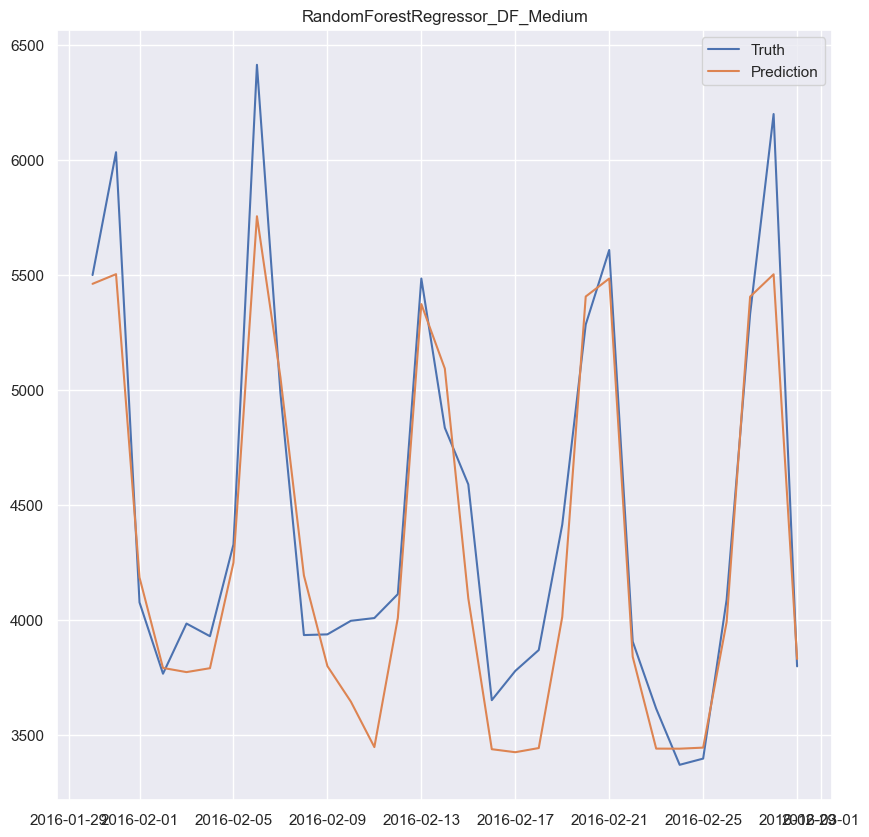

In [157]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor_DF_Medium')
plt.legend(['Truth','Prediction'])

Hier Hyperparameteroptimierung einfügen

In [158]:
forecast_rf_medium_alldata = rf_medium.fit(X_medium, y_medium)

prediction_rf_medium_alldata = pd.Series(data = forecast_rf_medium_alldata.predict(df_medium_future), index = pd.date_range(start = df_medium_future.index.min(), end = df_medium_future.index.max()))
prediction_rf_medium_alldata.index.name = 'Date'
prediction_rf_medium_alldata.name = 'sales'

prediction_rf_medium_alldata.to_csv('rf_medium_alldata.csv')

### Random Forest Regressor (Medium DF + shifted Sales)

In [159]:
# Data Frame Medium mit predicted Sales Feature aus vorangegangener Vorhersage Random Forest Regressor (Medium DF)
df_medium_sales_shift = df_medium.copy()
df_medium_sales_shift['sales_yesterday'] = df_medium_sales_shift['sales'].shift(1)
for i in range(0,30,1):
    df_medium_sales_shift.at[df_medium_sales_shift.iloc[len(df_medium_sales_shift)-(30-i)].name,'sales_yesterday'] = prediction_rf_medium_alldata.iloc[i]
df_medium_sales_shift['sales_last_week_same_day'] = df_medium_sales_shift['sales_yesterday'].shift(6)
df_medium_sales_shift = df_medium_sales_shift.iloc[7:]
df_medium_sales_shift

,sales,dayofweek,month,price,event_code,snap,sales_yesterday,sales_last_week_same_day
date,,,,,,,,
2011-03-08,2997.0,1.0,3.0,4.157467,-1.0,1.0,3138.000000,2549.000000
2011-03-09,2772.0,2.0,3.0,4.157467,2.0,1.0,2997.000000,2559.000000
2011-03-10,2650.0,3.0,3.0,4.157467,-1.0,1.0,2772.000000,2568.000000
2011-03-11,3249.0,4.0,3.0,4.157467,-1.0,0.0,2650.000000,2978.000000
2011-03-12,4114.0,5.0,3.0,4.186751,-1.0,0.0,3249.000000,4096.000000
...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0,5337.134313,5528.312938
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0,5010.507731,3861.483508
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0,3862.421734,3517.810191


In [160]:
#Zeitliche Aufteilung des Data Frames
df_medium_sales_shift_past = df_medium_sales_shift[df_medium_sales_shift.index<'2016-03-01']
df_medium_sales_shift_future = df_medium_sales_shift[df_medium_sales_shift.index>='2016-03-01']
df_medium_sales_shift_future.drop(columns='sales',inplace=True)
X_medium_sales_shift = df_medium_sales_shift_past.drop(columns='sales')
y_medium_sales_shift = df_medium_sales_shift_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\730454001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_sales_shift_future.drop(columns='sales',inplace=True)


In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium_sales_shift = RandomForestRegressor(n_estimators=1000,criterion='squared_error', max_depth= 8,max_features='log2',max_leaf_nodes = 650,random_state=42, min_samples_split = 9)
x_train, x_test, y_train, y_test = train_test_split(X_medium_sales_shift, y_medium_sales_shift, test_size=31, shuffle = False)
rf_medium_sales_shift.fit(x_train, y_train)

preds = rf_medium_sales_shift.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 233.47


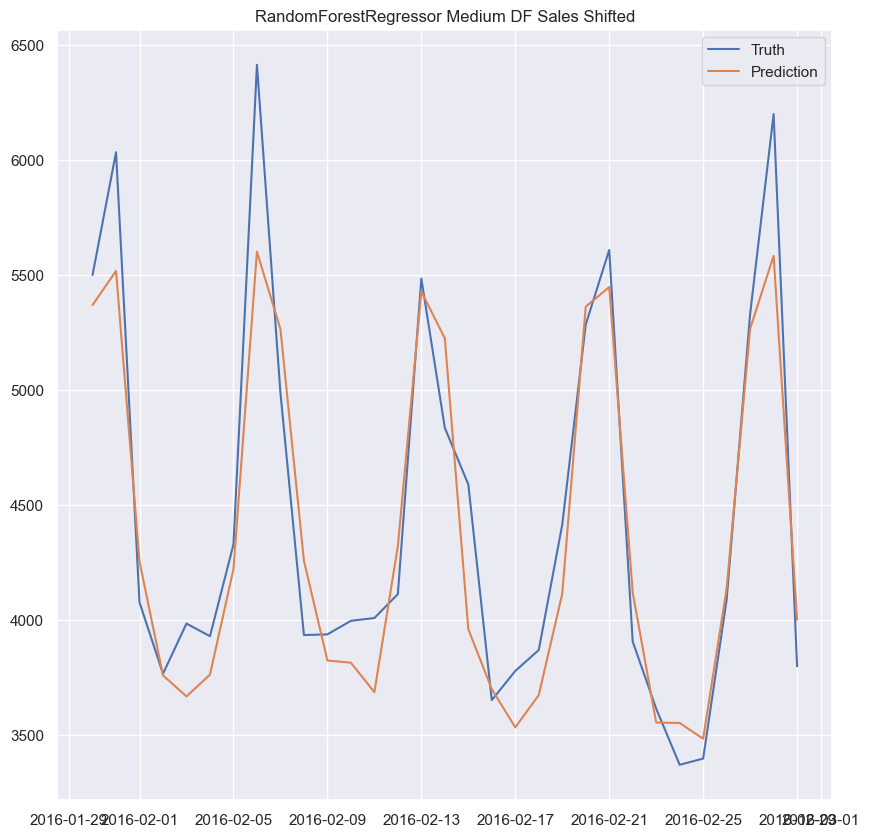

In [162]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor Medium DF Sales Shifted')
plt.legend(['Truth','Prediction'])

In [163]:
#Kreuzvalidierung des Modells
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_medium_sales_shift
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium_sales_shift,
        y=y_medium_sales_shift,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 289.98
MAE mad:	 49.79


C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\2323572716.py:23: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [ ]:
#Training auf gesamten Daten bis Ende Februar 2016
forecast_rf_medium_sales_shift_alldata = rf_medium_sales_shift.fit(X_medium_sales_shift, y_medium_sales_shift)

#Vorhersage auf März 2016
forecast_rf_medium_sales_shift_alldata = pd.Series(data = forecast_rf_medium_sales_shift_alldata.predict(df_medium_sales_shift_future), index = pd.date_range(start = df_medium_sales_shift_future.index.min(), end = df_medium_sales_shift_future.index.max()))

#Erstellung Panda Series
forecast_rf_medium_sales_shift_alldata.index.name = 'Date'
forecast_rf_medium_sales_shift_alldata.name = 'sales'

In [ ]:
#Speicherung als CSV-Datei
forecast_rf_medium_sales_shift_alldata.to_csv('rf_medium_sales_shift_alldata.csv')

### Random Forest Regressor (DF Complex)

#### Foods

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_foods = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_foods, y_foods, test_size=31, shuffle = False)
rf_foods.fit(x_train, y_train)

# predict on the same period
preds = rf_foods.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 239.75


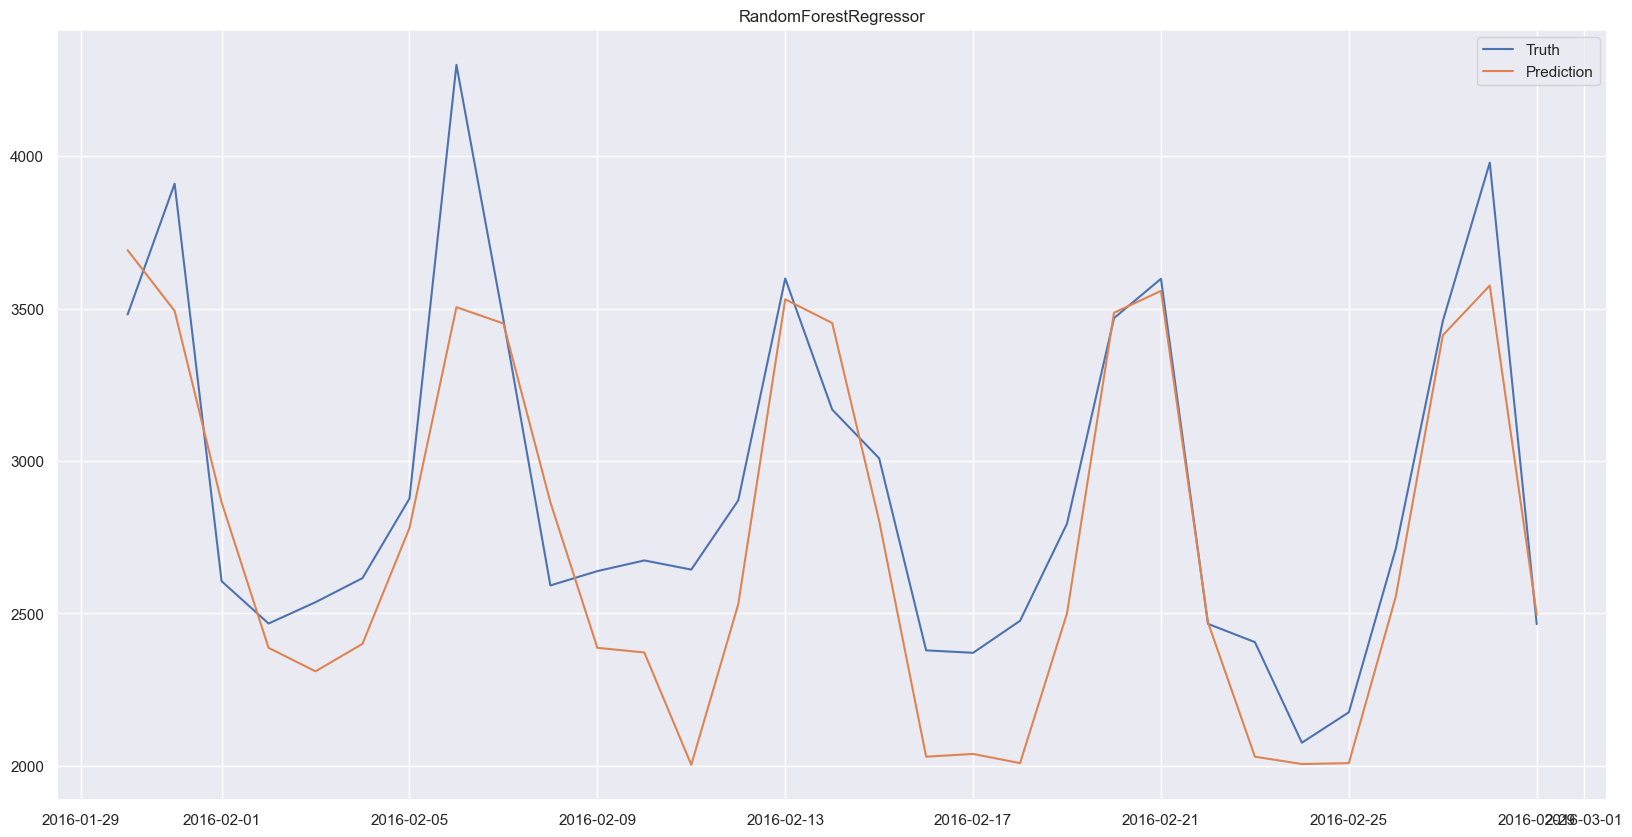

In [ ]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_foods
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_foods,
        y=y_foods,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 282.00
MAE mad:	 47.89


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\640663017.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [ ]:
forecast_rf_foods_alldata = rf_foods.fit(X_foods, y_foods)

prediction_rf_foods_alldata = pd.Series(data = forecast_rf_foods_alldata.predict(df_foods_future), index = pd.date_range(start = df_foods_future.index.min(), end = df_foods_future.index.max()))
prediction_rf_foods_alldata.index.name = 'Date'
prediction_rf_foods_alldata.name = 'sales'

prediction_rf_foods_alldata

Date
2016-03-01    2466.84
2016-03-02    2446.71
2016-03-03    2463.96
2016-03-04    2891.01
2016-03-05    3851.86
2016-03-06    3903.15
2016-03-07    2689.65
2016-03-08    2465.52
2016-03-09    2445.82
2016-03-10    2463.73
2016-03-11    2743.53
2016-03-12    3408.28
2016-03-13    3838.71
2016-03-14    2516.41
2016-03-15    2229.31
2016-03-16    2177.24
2016-03-17    2107.33
2016-03-18    2743.53
2016-03-19    3548.82
2016-03-20    3766.07
2016-03-21    2488.52
2016-03-22    2192.55
2016-03-23    2113.21
2016-03-24    2254.91
2016-03-25    2710.40
2016-03-26    3403.17
2016-03-27    3459.78
2016-03-28    2512.10
2016-03-29    2229.31
2016-03-30    2177.24
2016-03-31    2132.08
Freq: D, Name: sales, dtype: float64

#### Household

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_household = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_household, y_household, test_size=31, shuffle = False)
rf_household.fit(x_train, y_train)

# predict on the same period
preds = rf_household.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 138.04


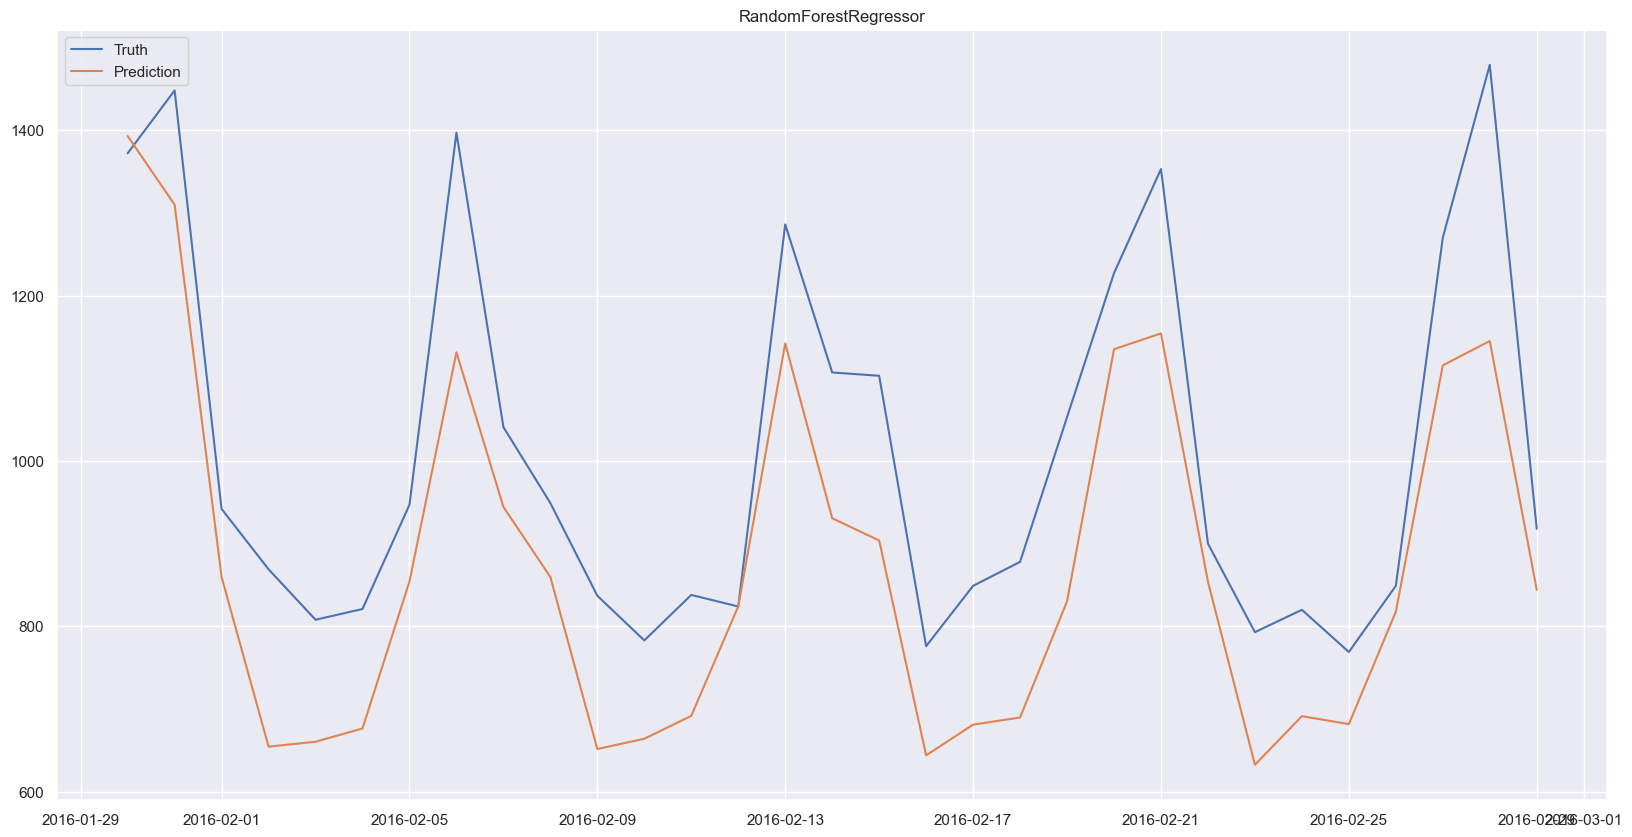

In [ ]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_household
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_household,
        y=y_household,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 132.87
MAE mad:	 25.22


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\1091543212.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [ ]:
forecast_rf_household_alldata = rf_household.fit(X_household, y_household)

prediction_rf_household_alldata = pd.Series(data = forecast_rf_household_alldata.predict(df_household_future), index = pd.date_range(start = df_household_future.index.min(), end = df_household_future.index.max()))
prediction_rf_household_alldata.index.name = 'Date'
prediction_rf_household_alldata.name = 'sales'

prediction_rf_household_alldata

Date
2016-03-01     797.68
2016-03-02     800.23
2016-03-03     791.54
2016-03-04     866.64
2016-03-05    1220.22
2016-03-06    1313.16
2016-03-07     916.69
2016-03-08     728.68
2016-03-09     753.36
2016-03-10     748.30
2016-03-11     846.02
2016-03-12    1226.36
2016-03-13    1350.60
2016-03-14     896.33
2016-03-15     707.91
2016-03-16     750.63
2016-03-17     741.80
2016-03-18     838.78
2016-03-19    1226.36
2016-03-20    1350.60
2016-03-21     896.33
2016-03-22     707.91
2016-03-23     750.63
2016-03-24     744.63
2016-03-25     838.78
2016-03-26    1234.10
2016-03-27    1013.13
2016-03-28     898.92
2016-03-29     716.41
2016-03-30     760.80
2016-03-31     749.73
Freq: D, Name: sales, dtype: float64

#### Hobbies

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_hobbies = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_hobbies, y_hobbies, test_size=31, shuffle = False)
rf_hobbies.fit(x_train, y_train)

# predict on the same period
preds = rf_hobbies.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 85.32


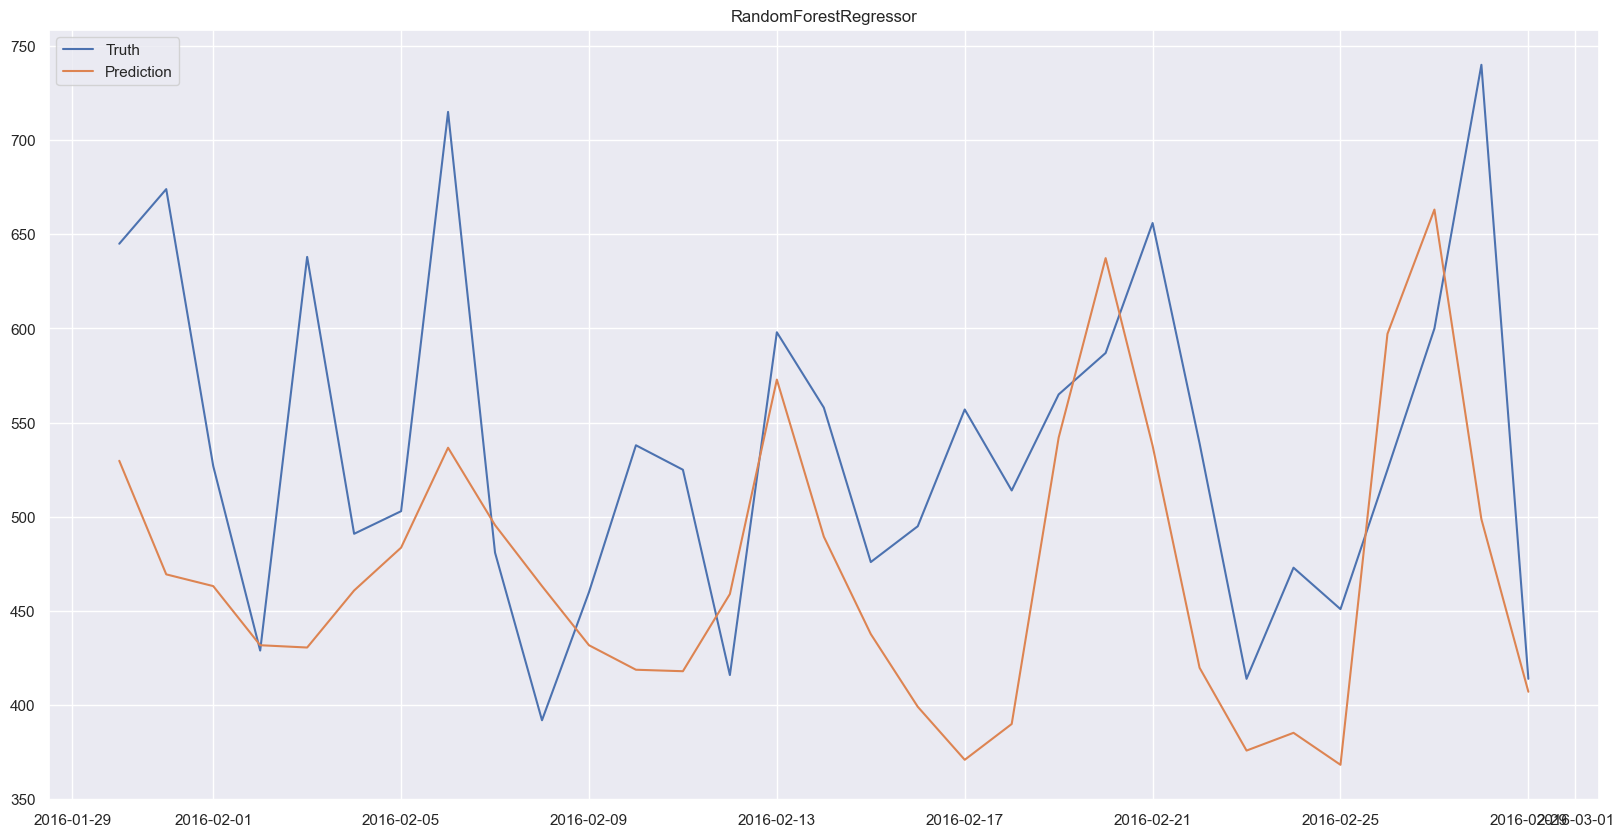

In [ ]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_hobbies
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_hobbies,
        y=y_hobbies,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 73.57
MAE mad:	 11.92


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\1897965379.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [ ]:
forecast_rf_hobbies_alldata = rf_hobbies.fit(X_hobbies, y_hobbies)

prediction_rf_hobbies_alldata = pd.Series(data = forecast_rf_hobbies_alldata.predict(df_hobbies_future), index = pd.date_range(start = df_hobbies_future.index.min(), end = df_hobbies_future.index.max()))
prediction_rf_hobbies_alldata.index.name = 'Date'
prediction_rf_hobbies_alldata.name = 'sales'

prediction_rf_hobbies_alldata

Date
2016-03-01    475.250000
2016-03-02    456.130833
2016-03-03    444.657500
2016-03-04    525.006667
2016-03-05    558.140000
2016-03-06    476.870000
2016-03-07    452.973500
2016-03-08    444.840143
2016-03-09    540.972500
2016-03-10    489.100000
2016-03-11    452.790000
2016-03-12    521.190000
2016-03-13    477.220000
2016-03-14    426.765000
2016-03-15    463.615000
2016-03-16    470.075000
2016-03-17    425.706667
2016-03-18    429.710000
2016-03-19    521.190000
2016-03-20    477.220000
2016-03-21    426.765000
2016-03-22    463.615000
2016-03-23    470.075000
2016-03-24    393.960000
2016-03-25    429.710000
2016-03-26    521.190000
2016-03-27    492.270000
2016-03-28    426.765000
2016-03-29    463.615000
2016-03-30    470.075000
2016-03-31    437.156667
Freq: D, Name: sales, dtype: float64

In [ ]:
prediction_rf_complex_alldata = prediction_rf_hobbies_alldata + prediction_rf_foods_alldata + prediction_rf_household_alldata
prediction_rf_complex_alldata

Date
2016-03-01    3739.770000
2016-03-02    3703.070833
2016-03-03    3700.157500
2016-03-04    4282.656667
2016-03-05    5630.220000
2016-03-06    5693.180000
2016-03-07    4059.313500
2016-03-08    3639.040143
2016-03-09    3740.152500
2016-03-10    3701.130000
2016-03-11    4042.340000
2016-03-12    5155.830000
2016-03-13    5666.530000
2016-03-14    3839.505000
2016-03-15    3400.835000
2016-03-16    3397.945000
2016-03-17    3274.836667
2016-03-18    4012.020000
2016-03-19    5296.370000
2016-03-20    5593.890000
2016-03-21    3811.615000
2016-03-22    3364.075000
2016-03-23    3333.915000
2016-03-24    3393.500000
2016-03-25    3978.890000
2016-03-26    5158.460000
2016-03-27    4965.180000
2016-03-28    3837.785000
2016-03-29    3409.335000
2016-03-30    3408.115000
2016-03-31    3318.966667
Freq: D, Name: sales, dtype: float64

In [ ]:
prediction_rf_complex_alldata.to_csv('rf_complex_alldata.csv')

### Random Forest Regressor (DF all)

In [169]:
df_all

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday
date,,,,,,,,,,,,,,,,,
2011-04-05,2784.0,1.0,4.0,14.0,201114.0,4.201332,-1,1.0,5.0,0.000000,0.008721,0,0,0.0,2549.0,16,18
2011-04-06,2602.0,2.0,4.0,14.0,201114.0,4.201332,-1,1.0,6.0,0.000000,0.008721,0,0,0.0,2559.0,17,17
2011-04-07,2976.0,3.0,4.0,14.0,201114.0,4.201332,-1,1.0,7.0,0.000000,0.008721,0,0,0.0,2568.0,18,16
2011-04-08,3294.0,4.0,4.0,14.0,201114.0,4.201332,-1,1.0,8.0,0.000000,0.008721,0,0,0.0,2978.0,19,15
2011-04-09,4083.0,5.0,4.0,14.0,201114.0,4.205870,-1,1.0,9.0,0.004538,0.004538,0,0,0.0,4096.0,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612.0,4.489718,0,0.0,27.0,0.000000,-0.000410,17,4,0.0,5607.0,0,4
2016-03-28,0.0,0.0,3.0,13.0,201613.0,4.489718,-1,0.0,28.0,0.000000,-0.000410,18,3,0.0,3905.0,1,3
2016-03-29,0.0,1.0,3.0,13.0,201613.0,4.489718,-1,0.0,29.0,0.000000,-0.000410,19,2,0.0,3613.0,2,2


#### Feature Importance mittels Random Forest Regressor

In [171]:
#Zunächst Training und Testing eines einfachen RF Modells, damit eine Benchmark im Weiteren besteht
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_all = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size=31, shuffle = False)
rf_all.fit(x_train, y_train)

preds = rf_all.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 356.07


In [173]:
#Kreuzvalidierung
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_all
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_all,
        y=y_all,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#Scoring anzeigen

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 345.85
MAE mad:	 47.56


C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\3580825629.py:26: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [175]:
#Feature Selection mittels SequentialFeatureSelector (vorwärts), bei der Features nacheinander zu einer leeren Kandidatengruppe hinzugefügt werden, bis die Hinzufügung weiterer Merkmale das Kriterium (mean_absolute_error) nicht mehr verschlechtert.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=True,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

14
336.1008387096775
('dayofweek', 'month', 'weekofyear', 'yearcw', 'price', 'event_code', 'snap', 'dayofmonth', 'price_change_day', 'price_change_week', 'snap_since', 'snap_until', 'snap_first_or_last_day', 'sales_last_month_same_day')


In [176]:
#Feature Selection mittels SequentialFeatureSelector (rückwärts), bei der Features nacheinander aus einer vollständigen Kandidatengruppe entfernt werden, bis das Löschen weiterer Merkmale das Kriterium (mean_absolute_error) nicht mehr verschlechtert.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=False,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

8
279.7832258064516
('dayofweek', 'month', 'weekofyear', 'price', 'event_code', 'dayofmonth', 'snap_first_or_last_day', 'days_until_next_holiday')


Aufgrund des geringeren mean_absolute_errors bei der sequentiellen rückwärts Auswahl, wurden die acht Features für das weitere Vorgehen ausgewählt

In [177]:
df_selected_features = df_all[['sales','dayofweek', 'month', 'weekofyear', 'price', 'event_code', 'dayofmonth', 'snap_first_or_last_day', 'days_until_next_holiday']]
df_selected_features

,sales,dayofweek,month,weekofyear,price,event_code,dayofmonth,snap_first_or_last_day,days_until_next_holiday
date,,,,,,,,,
2011-04-05,2784.0,1.0,4.0,14.0,4.201332,-1,5.0,0.0,18
2011-04-06,2602.0,2.0,4.0,14.0,4.201332,-1,6.0,0.0,17
2011-04-07,2976.0,3.0,4.0,14.0,4.201332,-1,7.0,0.0,16
2011-04-08,3294.0,4.0,4.0,14.0,4.201332,-1,8.0,0.0,15
2011-04-09,4083.0,5.0,4.0,14.0,4.205870,-1,9.0,0.0,14
...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,4.489718,0,27.0,0.0,4
2016-03-28,0.0,0.0,3.0,13.0,4.489718,-1,28.0,0.0,3
2016-03-29,0.0,1.0,3.0,13.0,4.489718,-1,29.0,0.0,2


In [178]:
#Zeitliche Aufteilung des Data Frames
df_selected_features_past = df_selected_features[df_selected_features.index<'2016-03-01']
df_selected_features_future = df_selected_features[df_selected_features.index>='2016-03-01']
df_selected_features_future.drop(columns='sales',inplace=True)
X_selected_features = df_selected_features_past.drop(columns='sales')
y_selected_features = df_selected_features_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\2507811242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features_future.drop(columns='sales',inplace=True)


In [179]:
#Random Forest mit manuell gesuchten Hyperparametern
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_selected_features = RandomForestRegressor(n_estimators=2500,criterion='squared_error', max_depth= 15,max_features='log2',max_leaf_nodes = 400,random_state=42, min_samples_split = 9)
x_train, x_test, y_train, y_test = train_test_split( X_selected_features, y_selected_features, test_size=31, shuffle = False)
rf_selected_features.fit(x_train, y_train)

preds = rf_selected_features.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 222.16


In [180]:
#Kreuzvalidierung
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_selected_features
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_selected_features,
        y=y_selected_features,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 269.54
MAE mad:	 41.27


C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\1445840070.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [181]:
#Training auf gesamten Dataframe bis Februar 2016
forecast_rf_selected_features = rf_selected_features.fit(X_selected_features, y_selected_features)

#Vorhersage für März 2016
prediction_rf_selected_features = pd.Series(data = forecast_rf_selected_features.predict(df_selected_features_future), index = pd.date_range(start = df_selected_features_future.index.min(), end = df_selected_features_future.index.max()))
prediction_rf_selected_features.index.name = 'Date'
prediction_rf_selected_features.name = 'sales'

prediction_rf_selected_features

Date
2016-03-01    3799.091907
2016-03-02    3833.703910
2016-03-03    3844.114399
2016-03-04    4221.824964
2016-03-05    5647.399409
2016-03-06    5759.326631
2016-03-07    4052.652741
2016-03-08    3757.057478
2016-03-09    3748.701250
2016-03-10    3751.019549
2016-03-11    4114.182791
2016-03-12    5400.093013
2016-03-13    5517.015712
2016-03-14    3956.112016
2016-03-15    3666.813931
2016-03-16    3645.768995
2016-03-17    3432.440226
2016-03-18    4089.416305
2016-03-19    5371.667091
2016-03-20    5508.014146
2016-03-21    3894.064786
2016-03-22    3583.142163
2016-03-23    3553.184595
2016-03-24    3483.191452
2016-03-25    4149.235687
2016-03-26    5340.552508
2016-03-27    5124.847269
2016-03-28    3816.548502
2016-03-29    3477.540870
2016-03-30    3578.888596
2016-03-31    3631.328007
Freq: D, Name: sales, dtype: float64

In [ ]:
prediction_rf_selected_features.to_csv('rf_selected_features_alldata.csv')

In [182]:
#Getätigte Vorhersage geshifted in df_all ergänzt
df_all['sales_yesterday'] = df_all['sales'].shift(1)
for i in range(0,30,1):
    df_all.at[df_all.iloc[len(df_all)-(30-i)].name,'sales_yesterday'] = prediction_rf_selected_features.iloc[i]
df_all['sales_last_week_same_day'] = df_all['sales_yesterday'].shift(6)
df_all = df_all.iloc[7:]
df_all

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\608379321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['sales_yesterday'] = df_all['sales'].shift(1)
C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\608379321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['sales_last_week_same_day'] = df_all['sales_yesterday'].shift(6)


,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday,sales_yesterday,sales_last_week_same_day
date,,,,,,,,,,,,,,,,,,,
2011-04-12,2512.0,1.0,4.0,15.0,201115.0,4.205870,-1,0.0,12.0,0.000000,0.004538,2,18,0.0,2997.0,23,11,3015.000000,2784.000000
2011-04-13,2217.0,2.0,4.0,15.0,201115.0,4.205870,-1,0.0,13.0,0.000000,0.004538,3,17,0.0,2772.0,24,10,2512.000000,2602.000000
2011-04-14,2520.0,3.0,4.0,15.0,201115.0,4.205870,-1,0.0,14.0,0.000000,0.004538,4,16,0.0,2650.0,25,9,2217.000000,2976.000000
2011-04-15,2867.0,4.0,4.0,15.0,201115.0,4.205870,-1,0.0,15.0,0.000000,0.004538,5,15,0.0,3249.0,26,8,2520.000000,3294.000000
2011-04-16,3571.0,5.0,4.0,15.0,201115.0,4.206068,-1,0.0,16.0,0.000198,0.000198,6,14,0.0,4114.0,27,7,2867.000000,4083.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612.0,4.489718,0,0.0,27.0,0.000000,-0.000410,17,4,0.0,5607.0,0,4,5340.552508,5508.014146
2016-03-28,0.0,0.0,3.0,13.0,201613.0,4.489718,-1,0.0,28.0,0.000000,-0.000410,18,3,0.0,3905.0,1,3,5124.847269,3894.064786
2016-03-29,0.0,1.0,3.0,13.0,201613.0,4.489718,-1,0.0,29.0,0.000000,-0.000410,19,2,0.0,3613.0,2,2,3816.548502,3583.142163


In [183]:
#Zeitliche Aufteilung des Data Frames
df_all_past = df_all[df_all.index<'2016-03-01']
df_all_future = df_all[df_all.index>='2016-03-01']
df_all_future.drop(columns='sales',inplace=True)
X_all = df_all_past.drop(columns='sales')
y_all = df_all_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\2991109411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_future.drop(columns='sales',inplace=True)


In [186]:
#Training und Testing eines einfachen RF Modells mit erweitertem Data Frame
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_all = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size=31, shuffle = False)
rf_all.fit(x_train, y_train)

preds = rf_all.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 264.30


In [187]:
#Kreuzvalidierung
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_all
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_all,
        y=y_all,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 322.56
MAE mad:	 74.56


C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\1594841910.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


Folgende Feature Selections (vorwärts & rückwärts) ergeben identische Feature(anzahl) und Scoring

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=True,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

7
287.7649032258065
('dayofweek', 'month', 'price', 'event_code', 'snap_until', 'days_until_next_holiday', 'sales_yesterday')


In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=False,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

7
287.7649032258065
('dayofweek', 'month', 'price', 'event_code', 'snap_until', 'days_until_next_holiday', 'sales_yesterday')


In [190]:
#Erstellung eines neuen Data Frames mit ausgewählten Features
df_selected_features_II = df_all[['sales','dayofweek', 'month', 'price', 'event_code', 'snap_until', 'days_until_next_holiday', 'sales_yesterday']]
df_selected_features_II

,sales,dayofweek,month,price,event_code,snap_until,days_until_next_holiday,sales_yesterday
date,,,,,,,,
2011-04-12,2512.0,1.0,4.0,4.205870,-1,18,11,3015.000000
2011-04-13,2217.0,2.0,4.0,4.205870,-1,17,10,2512.000000
2011-04-14,2520.0,3.0,4.0,4.205870,-1,16,9,2217.000000
2011-04-15,2867.0,4.0,4.0,4.205870,-1,15,8,2520.000000
2011-04-16,3571.0,5.0,4.0,4.206068,-1,14,7,2867.000000
...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0,4,4,5340.552508
2016-03-28,0.0,0.0,3.0,4.489718,-1,3,3,5124.847269
2016-03-29,0.0,1.0,3.0,4.489718,-1,2,2,3816.548502


In [191]:
#Zeitliche Aufteilung
df_selected_features_II_past = df_selected_features_II[df_selected_features_II.index<'2016-03-01']
df_selected_features_II_future = df_selected_features_II[df_selected_features_II.index>='2016-03-01']
df_selected_features_II_future.drop(columns='sales',inplace=True)
X_selected_features_II = df_selected_features_II_past.drop(columns='sales')
y_selected_features_II = df_selected_features_II_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\1175364628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features_II_future.drop(columns='sales',inplace=True)


In [192]:
#Random Forest mit manuell gesuchten Hyperparametern
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_selected_features_II = RandomForestRegressor(n_estimators=800,criterion='squared_error', max_depth= 15,max_features='log2',max_leaf_nodes = 300,random_state=42, min_samples_split = 3)
x_train, x_test, y_train, y_test = train_test_split( X_selected_features_II, y_selected_features_II, test_size=31, shuffle = False)
rf_selected_features_II.fit(x_train, y_train)

preds = rf_selected_features_II.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 226.46


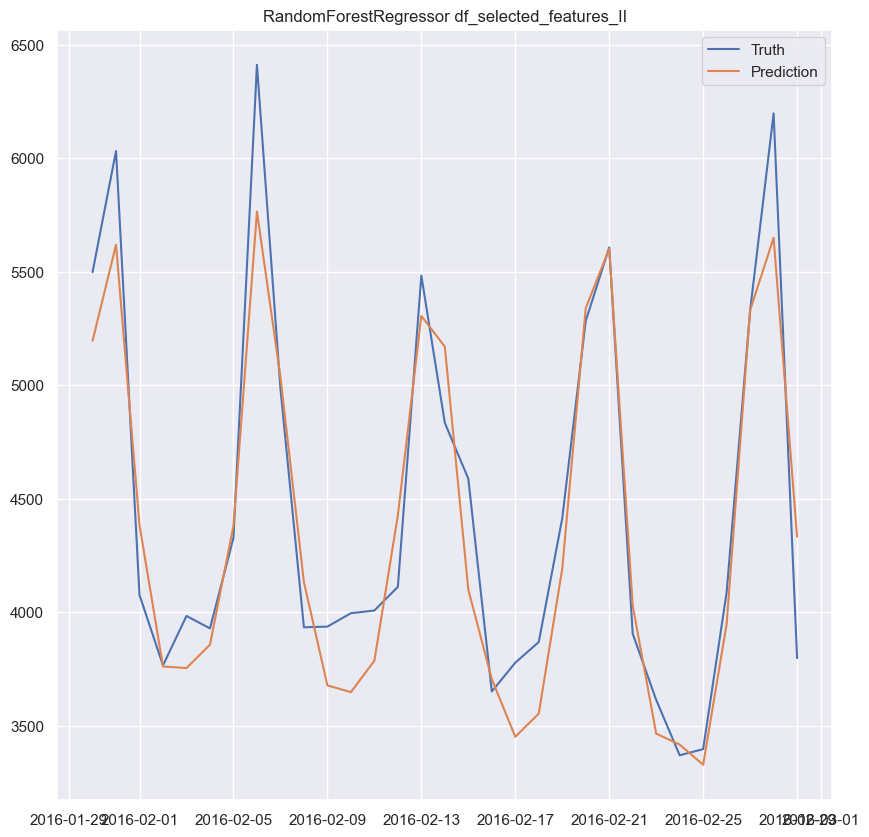

In [193]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor df_selected_features_II')
plt.legend(['Truth','Prediction'])

In [194]:
#Kreuzvalidierung
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_selected_features_II
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_selected_features_II,
        y=y_selected_features_II,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 272.41
MAE mad:	 34.93


C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\3822773072.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [195]:
#Training auf gesamten Dataframe bis Februar 201
forecast_rf_selected_features_II = rf_selected_features_II.fit(X_selected_features_II, y_selected_features_II)

#Vorhersage für März 2016
prediction_rf_selected_features_II = pd.Series(data = forecast_rf_selected_features_II.predict(df_selected_features_II_future), index = pd.date_range(start = df_selected_features_II_future.index.min(), end = df_selected_features_II_future.index.max()))
prediction_rf_selected_features_II.index.name = 'Date'
prediction_rf_selected_features_II.name = 'sales'

prediction_rf_selected_features_II

Date
2016-03-01    3740.716107
2016-03-02    3786.399064
2016-03-03    3834.537986
2016-03-04    4306.322899
2016-03-05    5512.837962
2016-03-06    5828.616529
2016-03-07    4070.288053
2016-03-08    3815.053264
2016-03-09    3761.823879
2016-03-10    3668.873802
2016-03-11    4263.931434
2016-03-12    5295.717510
2016-03-13    5589.551114
2016-03-14    4132.294924
2016-03-15    3737.943218
2016-03-16    3644.919996
2016-03-17    3348.625989
2016-03-18    4116.835596
2016-03-19    5271.699224
2016-03-20    5581.015391
2016-03-21    4122.240587
2016-03-22    3640.561170
2016-03-23    3548.335493
2016-03-24    3359.727329
2016-03-25    4153.128686
2016-03-26    5195.365671
2016-03-27    5112.478594
2016-03-28    3990.797836
2016-03-29    3608.008592
2016-03-30    3538.303704
2016-03-31    3733.803468
Freq: D, Name: sales, dtype: float64

In [ ]:
#Erstellung CSV Datei
prediction_rf_selected_features_II.to_csv('rf_selected_features_II_alldata.csv')

### Artificial Neural Network

#### Medium Data Frame

In [141]:
df_medium_norm = df_medium.copy()
df_medium_norm

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0


##### Daten für den input layer des Neuronalen Netzwerks vorbereiten 

In [142]:
#Skalierung der metrischen Variable "Price"
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
norm_price = scaler.fit_transform(df_medium_norm[['price']])
df_medium_norm['price'] = norm_price
df_medium_norm

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,0.028194,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,0.028194,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,0.028194,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,0.028194,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,0.000000,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,0.972627,0.0,0.0
2016-03-28,0.0,0.0,3.0,0.972627,-1.0,0.0
2016-03-29,0.0,1.0,3.0,0.972627,-1.0,0.0


In [143]:
#Dummy Codierung für nominale und oridnale Variablen

df_medium_norm = pd.get_dummies(
    data = df_medium_norm,
    columns = ['dayofweek','month','event_code','snap'],
    drop_first = False
)
df_medium_norm

,sales,price,dayofweek_0.0,dayofweek_1.0,dayofweek_2.0,dayofweek_3.0,dayofweek_4.0,dayofweek_5.0,dayofweek_6.0,month_1.0,...,month_10.0,month_11.0,month_12.0,event_code_-1.0,event_code_0.0,event_code_1.0,event_code_2.0,event_code_3.0,snap_0.0,snap_1.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.028194,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-02,2559.0,0.028194,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-03,2568.0,0.028194,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-04,2978.0,0.028194,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-05,4096.0,0.000000,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,0.972627,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2016-03-28,0.0,0.972627,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-03-29,0.0,0.972627,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [144]:
#Zeitliche Aufteilung des DataFrames und Vorbereitung auf Train Test Split

df_medium_norm_past = df_medium_norm[df_medium_norm.index<'2016-03-01']
df_medium_norm_future = df_medium_norm[df_medium_norm.index>='2016-03-01']
df_medium_norm_future.drop(columns='sales',inplace=True)
X_medium_norm = df_medium_norm_past.drop(columns='sales')
y_medium_norm = df_medium_norm_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_21192\2229975546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_norm_future.drop(columns='sales',inplace=True)


In [145]:
#Skalierung der metrischen Variable "Sales"
from sklearn.preprocessing import StandardScaler

target_variable = df_medium_norm_past['sales'].values
TargetVarScaler=StandardScaler()
target_variable = target_variable.reshape(-1, 1)
TargetVarScalerFit=TargetVarScaler.fit(target_variable)
y_medium_norm = TargetVarScalerFit.transform(target_variable)
y_medium_norm

array([[-1.4937988 ],
       [-1.48365713],
       [-1.47452963],
       ...,
       [ 1.32558478],
       [ 2.20689569],
       [-0.22811869]])

In [146]:
#Train Test Split des skalierten Data Frames
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_medium_norm, y_medium_norm, test_size=31, shuffle = False)

In [147]:
#Aufbau/Struktur Neuronales Netzwerk mit jeweils einer Eingabe-, Versteckten und Ausgabeebene

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential()

#first layer
ann.add(Dense(units=5, input_dim=27, kernel_initializer='normal', activation='relu'))

#hidden layer
ann.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#output layer: Das Ausgangsneuron ist ein einzelner vollständig verbundener Knoten
ann.add(Dense(1, kernel_initializer='normal'))

In [148]:
#Zusammenstellung des Modells
ann.compile(loss='mean_absolute_error', optimizer='adam')

In [149]:
#Fitten des Modells auf die Trainingsdaten
ann.fit(x_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
90/90 [==============================] - 1s 1ms/step - loss: 0.7901
Epoch 2/50
90/90 [==============================] - 0s 1ms/step - loss: 0.7587
Epoch 3/50
90/90 [==============================] - 0s 1ms/step - loss: 0.6529
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 0.5305
Epoch 5/50
90/90 [==============================] - 0s 1ms/step - loss: 0.4488
Epoch 6/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3992
Epoch 7/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3744
Epoch 8/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3651
Epoch 9/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3592
Epoch 10/50
90/90 [==============================] - 0s 994us/step - loss: 0.3554
Epoch 11/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3559
Epoch 12/50
90/90 [==============================] - 0s 966us/step - loss: 0.3534
Epoch 13/50
90/90 [==========================

In [150]:
#Prognosedurchführung
Predictions=ann.predict(x_test)

1/1 [==============================] - 0s 46ms/step


In [151]:
#Werte zurückskalieren
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

#Bewertung mittels Mean Absolut Error
from sklearn.metrics import mean_absolute_error as MAE
print('MAE:\t %4.2f' % (MAE(y_true = y_test_orig, y_pred = Predictions)))

MAE:	 250.53


In [152]:
#Modell auf gesamten Daten bis Ende Februar trainieren
ann.fit(X_medium_norm, y_medium_norm,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3427
Epoch 2/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3417
Epoch 3/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3415
Epoch 4/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3424
Epoch 5/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3401
Epoch 6/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3401
Epoch 7/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3397
Epoch 8/50
92/92 [==============================] - 0s 2ms/step - loss: 0.3398
Epoch 9/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3391
Epoch 10/50
92/92 [==============================] - 0s 1ms/step - loss: 0.3384
Epoch 11/50
92/92 [==============================] - 0s 935us/step - loss: 0.3388
Epoch 12/50
92/92 [==============================] - 0s 988us/step - loss: 0.3386
Epoch 13/50
92/92 [==========================

In [153]:
#Vorhersage für März 2016
prediction_ann_alldata = ann.predict(df_medium_norm_future)
prediction_ann_alldata

1/1 [==============================] - 0s 30ms/step


array([[-0.04056557],
       [-0.08574902],
       [-0.04295506],
       [ 0.5105095 ],
       [ 1.506343  ],
       [ 1.7698761 ],
       [ 0.43108618],
       [-0.05427997],
       [-0.09946351],
       [-0.05666964],
       [ 0.21606936],
       [ 1.2071996 ],
       [ 1.4730017 ],
       [ 0.0342456 ],
       [-0.45112073],
       [-0.49630415],
       [-0.814511  ],
       [ 0.21506481],
       [ 1.2082088 ],
       [ 1.4740112 ],
       [ 0.03601943],
       [-0.44934684],
       [-0.49453032],
       [-0.3750298 ],
       [ 0.21629758],
       [ 1.2070407 ],
       [ 0.8578969 ],
       [ 0.03396647],
       [-0.45139992],
       [-0.49658328],
       [-0.45378947]], dtype=float32)

In [154]:
#Rückskalierung der vorhergesagten Werte
prediction_ann_alldata_norm = TargetVarScalerFit.inverse_transform(prediction_ann_alldata)

#Umwandlung des Arrays in eine Pandas Series
prediction_ann_alldata_norm_df = pd.DataFrame(prediction_ann_alldata_norm, index = df_medium_future.index)
prediction_ann_alldata = pd.Series(data = prediction_ann_alldata_norm_df[0])
prediction_ann_alldata.index.name = 'Date'
prediction_ann_alldata.name = 'sales'
prediction_ann_alldata

Date
2016-03-01    3981.933105
2016-03-02    3937.380859
2016-03-03    3979.577148
2016-03-04    4525.310547
2016-03-05    5507.233398
2016-03-06    5767.084961
2016-03-07    4446.996582
2016-03-08    3968.410400
2016-03-09    3923.857910
2016-03-10    3966.054199
2016-03-11    4234.983398
2016-03-12    5212.268555
2016-03-13    5474.357910
2016-03-14    4055.699463
2016-03-15    3577.113037
2016-03-16    3532.560791
2016-03-17    3218.798828
2016-03-18    4233.992676
2016-03-19    5213.263672
2016-03-20    5475.353027
2016-03-21    4057.448486
2016-03-22    3578.862061
2016-03-23    3534.309814
2016-03-24    3652.141113
2016-03-25    4235.208496
2016-03-26    5212.111816
2016-03-27    4867.845215
2016-03-28    4055.424072
2016-03-29    3576.837646
2016-03-30    3532.285645
2016-03-31    3574.481689
Name: sales, dtype: float32

In [ ]:
#Speicherung als CSV-Datei
prediction_ann_alldata.to_csv('prediction_ann_alldata.csv')

kommt später bei Modellen

### Creation Dataframe Sales Prediction

In [ ]:
df_medium_loop = df_medium_exp.copy()
df_medium_loop

,sales,dayofweek,month,price,snap,number_holidays_week_before,number_holidays_week_after,price_change_week,snap_until,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday
date,,,,,,,,,,,,
2011-04-05,2784.0,1.0,4.0,4.201332,1.0,0,0,0.008721,0,2549.0,16,18
2011-04-06,2602.0,2.0,4.0,4.201332,1.0,0,0,0.008721,0,2559.0,17,17
2011-04-07,2976.0,3.0,4.0,4.201332,1.0,0,0,0.008721,0,2568.0,18,16
2011-04-08,3294.0,4.0,4.0,4.201332,1.0,0,0,0.008721,0,2978.0,19,15
2011-04-09,4083.0,5.0,4.0,4.205870,1.0,0,0,0.004538,0,4096.0,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,1,1,-0.000410,4,5607.0,0,4
2016-03-28,0.0,0.0,3.0,4.489718,0.0,0,0,-0.000410,3,3905.0,1,3
2016-03-29,0.0,1.0,3.0,4.489718,0.0,0,0,-0.000410,2,3613.0,2,2


In [ ]:
df_medium_loop['sales_yesterday'] = df_medium_loop['sales'].shift(1)
df_medium_loop = df_medium_loop.iloc[1:]
#df_medium_loop['sales_same_day_last_week'] = df_medium_loop['sales'].shift(7)
df_medium_loop = df_medium_loop[df_medium_loop.index>'2011-04-11']

df_medium_loop_past = df_medium_loop[df_medium_loop.index<'2016-03-01']
df_medium_loop_future = df_medium_loop[df_medium_loop.index>='2016-03-01']
df_medium_loop_future.drop(columns='sales',inplace=True)
X_medium_loop = df_medium_loop_past.drop(columns='sales')
y_medium_loop = df_medium_loop_past['sales']


C:\Users\Dave\AppData\Local\Temp\ipykernel_5076\4216951661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_loop_future.drop(columns='sales',inplace=True)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium_loop = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_medium_loop, y_medium_loop, test_size=31, shuffle = False)

rf_medium_loop.fit(x_train, y_train)
preds = pd.Series(rf_medium_loop.predict(x_test.iloc[0].values.reshape(1,-1))) #Sales Wert 30.01.2016
x_train = x_train.append(x_test.iloc[0]) #Einfügen aller Werte aus x_test für den 30.01.2016 im train set
y_train = y_train.append(preds) #Einfügen des Sales Wertes für den 30.01.2016 im train set
y_train.rename(index={0: x_test.iloc[0].name}, inplace=True) #Umbenennen des Index in den Datumswert
x_train.at[x_test.iloc[0].name,'sales_yesterday'] = x_test.iloc[0,11] 
x_test = x_test.iloc[1: , :] #Entfernen des predicteten 30.01.2016 aus dem Test Set, da wir diesen in der Schleife nicht nochmal predicten wollen

for i in range(0,30,1):
    rf_medium_loop.fit(x_train, y_train)
    preds = pd.Series(rf_medium_loop.predict(x_test.iloc[i].values.reshape(1,-1)))  #Sales Wert 31.01.2016 im ersten Durchlauf
    x_train = x_train.append(x_test.iloc[i]) #Einfügen aller Werte aus x_test für den 31.01.2016 im train set im ersten Durchlauf
    y_train = y_train.append(preds) #Einfügen des Sales Wertes für den 31.01.2016 im train set im ersten Durchlauf
    y_train.rename(index={0: x_test.iloc[i].name}, inplace=True) #Umbenennen des Index in den Datumswert
    x_train.at[x_test.iloc[i].name,'sales_yesterday'] = y_train.iloc[(len(y_train)-2)]

In [ ]:
predss = y_train.tail(31)

In [ ]:
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = predss)))

MAE:	 299.03


In [ ]:
df_medium_loop_future

,dayofweek,month,price,snap,number_holidays_week_before,number_holidays_week_after,price_change_week,snap_until,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday,sales_yesterday
date,,,,,,,,,,,,
2016-03-01,1.0,3.0,4.492801,1.0,0,0,-0.002204,0,3246.0,13,15,3797.0
2016-03-02,2.0,3.0,4.492801,1.0,0,0,-0.002204,0,3031.0,14,14,0.0
2016-03-03,3.0,3.0,4.492801,1.0,0,0,-0.002204,0,3173.0,15,13,0.0
2016-03-04,4.0,3.0,4.492801,1.0,0,0,-0.002204,0,3871.0,16,12,0.0
2016-03-05,5.0,3.0,4.490062,1.0,0,0,-0.002739,0,5498.0,17,11,0.0
2016-03-06,6.0,3.0,4.490062,1.0,0,0,-0.002739,0,6032.0,18,10,0.0
2016-03-07,0.0,3.0,4.490062,1.0,0,0,-0.002739,0,4075.0,19,9,0.0
2016-03-08,1.0,3.0,4.490062,1.0,0,0,-0.002739,0,3765.0,20,8,0.0
2016-03-09,2.0,3.0,4.490062,1.0,0,0,-0.002739,0,3983.0,21,7,0.0


In [ ]:
y_medium_loop

date
2011-04-12    2512.0
2011-04-13    2217.0
2011-04-14    2520.0
2011-04-15    2867.0
2011-04-16    3571.0
               ...  
2016-02-25    3396.0
2016-02-26    4087.0
2016-02-27    5329.0
2016-02-28    6198.0
2016-02-29    3797.0
Name: sales, Length: 1785, dtype: float64

In [ ]:
X_medium_loop

,dayofweek,month,price,snap,number_holidays_week_before,number_holidays_week_after,price_change_week,snap_until,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday,sales_yesterday
date,,,,,,,,,,,,
2011-04-12,1.0,4.0,4.205870,0.0,0,0,0.004538,18,2997.0,23,11,3015.0
2011-04-13,2.0,4.0,4.205870,0.0,0,0,0.004538,17,2772.0,24,10,2512.0
2011-04-14,3.0,4.0,4.205870,0.0,0,0,0.004538,16,2650.0,25,9,2217.0
2011-04-15,4.0,4.0,4.205870,0.0,0,0,0.004538,15,3249.0,26,8,2520.0
2011-04-16,5.0,4.0,4.206068,0.0,0,0,0.000198,14,4114.0,27,7,2867.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,3.0,2.0,4.495005,0.0,0,0,0.004418,4,3502.0,8,20,3369.0
2016-02-26,4.0,2.0,4.495005,0.0,0,0,0.004418,3,3612.0,9,19,3396.0
2016-02-27,5.0,2.0,4.492801,0.0,0,0,-0.002204,2,5923.0,10,18,4087.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium_loop = RandomForestRegressor(random_state=42)

rf_medium_loop.fit(X_medium_loop, y_medium_loop)
preds = pd.Series(rf_medium_loop.predict(df_medium_loop_future.iloc[0].values.reshape(1,-1))) #Sales Wert 30.01.2016
X_medium_loop = X_medium_loop.append(df_medium_loop_future.iloc[0]) #Einfügen aller Werte aus x_test für den 30.01.2016 im train set
y_medium_loop = y_medium_loop.append(preds) #Einfügen des Sales Wertes für den 30.01.2016 im train set
y_medium_loop.rename(index={0: df_medium_loop_future.iloc[0].name}, inplace=True) #Umbenennen des Index in den Datumswert
X_medium_loop.at[df_medium_loop_future.iloc[0].name,'sales_yesterday'] = df_medium_loop_future.iloc[0,11] 
df_medium_loop_future = df_medium_loop_future.iloc[1: , :] #Entfernen des predicteten 30.01.2016 aus dem Test Set, da wir diesen in der Schleife nicht nochmal predicten wollen

for i in range(0,30,1):
    rf_medium_loop.fit(X_medium_loop, y_medium_loop)
    preds = pd.Series(rf_medium_loop.predict(df_medium_loop_future.iloc[i].values.reshape(1,-1)))  #Sales Wert 31.01.2016 im ersten Durchlauf
    X_medium_loop = X_medium_loop.append(df_medium_loop_future.iloc[i]) #Einfügen aller Werte aus x_test für den 31.01.2016 im train set im ersten Durchlauf
    y_medium_loop = y_medium_loop.append(preds) #Einfügen des Sales Wertes für den 31.01.2016 im train set im ersten Durchlauf
    y_medium_loop.rename(index={0: df_medium_loop_future.iloc[i].name}, inplace=True) #Umbenennen des Index in den Datumswert
    X_medium_loop.at[df_medium_loop_future.iloc[i].name,'sales_yesterday'] = y_medium_loop.iloc[(len(y_medium_loop)-2)]

In [ ]:
predsss = y_medium_loop.tail(31)

In [ ]:
prediction_rf_medium_loop_alldata = pd.Series(data = predsss, index = pd.date_range(start = predsss.index.min(), end = predsss.index.max()))
prediction_rf_medium_loop_alldata.index.name = 'Date'
prediction_rf_medium_loop_alldata.name = 'sales'

prediction_rf_medium_loop_alldata

Date
2016-03-01    3793.800000
2016-03-02    3123.628000
2016-03-03    3160.738840
2016-03-04    3309.700000
2016-03-05    4384.790000
2016-03-06    4177.540100
2016-03-07    3173.850000
2016-03-08    2961.287000
2016-03-09    3034.319830
2016-03-10    2929.782586
2016-03-11    3489.460000
2016-03-12    4194.494800
2016-03-13    4118.963633
2016-03-14    2948.001266
2016-03-15    2968.583440
2016-03-16    3010.237058
2016-03-17    2918.641196
2016-03-18    3320.808400
2016-03-19    4004.041288
2016-03-20    4076.973828
2016-03-21    3891.891153
2016-03-22    2885.915363
2016-03-23    2877.404056
2016-03-24    2883.520651
2016-03-25    2648.343066
2016-03-26    4010.235290
2016-03-27    4035.851574
2016-03-28    2781.204089
2016-03-29    2848.225058
2016-03-30    2895.376020
2016-03-31    2909.619438
Freq: D, Name: sales, dtype: float64

In [ ]:
prediction_rf_medium_loop_alldata.to_csv('rf_medium_loop_alldata.csv')